# Kepler Framework Examples

In [1]:
from kepler.pandas.menu       import ElectronSequence as Chain
from kepler.pandas.readers    import load, load_in_loop
from kepler.pandas.decorators import create_ringer_v8_decorators, create_ringer_v9_decorators, RingerDecorator
from kepler.pandas.decorators import create_ringer_v8_new_decorators, create_ringer_v8_half_fast_decorators, create_ringer_v8_34_decorators, create_ringer_v8_half_decorators, create_ringer_v8_14_decorators

import kepler
import tqdm
import rootplotlib as rpl
import mplhep as hep
import root_numpy
import ROOT
ROOT.gStyle.SetOptStat(0);
import array

import numpy as np
import pandas as pd
import collections
import os
from pprint import pprint
from copy import deepcopy
import gc


import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

import mplhep as hep

import warnings
warnings.filterwarnings('ignore')
plt.style.use(hep.style.ROOT)
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

Welcome to JupyROOT 6.16/00
Using all sub packages with ROOT dependence


# Running for Zee samples

In [2]:
## codigo original
# dpath = '/home/jodafons/public/cern_data/new_files/data17_13TeV.AllPeriods.sgn.probes_lhvloose_EGAM1.bkg.vprobes_vlhvloose_EGAM7.GRL_v97.25bins'
# dpath+= '/data17_13TeV.AllPeriods.sgn.probes_lhvloose_EGAM1.bkg.vprobes_vlhvloose_EGAM7.GRL_v97.25bins_et{ET}_eta{ETA}.npz'
# paths = []
# for et in range(5):
#     for eta in range(5):
#         paths.append( dpath.format(ET=et,ETA=eta) )

real_run = False

## Load Data

In [3]:
# codigo modificado
dpath = '/home/pedro.lima/data/data17_13TeV.AllPeriods.sgn.probes_lhvloose_EGAM1.bkg.vprobes_vlhvloose_EGAM7.GRL_v97.25bins'
dpath+= '/data17_13TeV.AllPeriods.sgn.probes_lhvloose_EGAM1.bkg.vprobes_vlhvloose_EGAM7.GRL_v97.25bins_et{ET}_eta{ETA}.npz'
#                                               \
#                                           very loose
paths = []

dev = False
#    False carrega todas as regioes

if dev:
    range_et = [4]   #leblon = 4
    range_eta = [0]  #leblon = 0
else:
    range_et = range(5)
    range_eta = range(5)

for et in range_et:
    for eta in range_eta:
        paths.append( dpath.format(ET=et,ETA=eta) )
# look here: https://github.com/ringer-softwares/kolmov/blob/master/kolmov/utils/constants.py

In [4]:
drop_columns = [
                    'RunNumber', 
                    #'avgmu',
                    #'trig_L2_cl_et',
                    #'trig_L2_cl_eta',
                    #'trig_L2_cl_phi',
                    #'trig_L2_cl_reta',
                    #'trig_L2_cl_ehad1', 
                    #'trig_L2_cl_eratio',
                    #'trig_L2_cl_f1', 
                    #'trig_L2_cl_f3', 
                    #'trig_L2_cl_weta2', 
                    #'trig_L2_cl_wstot', 
                    'trig_L2_cl_e2tsts1',
                    'trig_L2_el_hastrack',
                    #'trig_L2_el_pt',
                    'trig_L2_el_eta',
                    'trig_L2_el_phi',
                    'trig_L2_el_caloEta',
                    'trig_L2_el_trkClusDeta',
                    'trig_L2_el_trkClusDphi',
                    'trig_L2_el_etOverPt',
                    'trig_EF_cl_hascluster',
                    #'trig_EF_cl_et',
                    'trig_EF_cl_eta',
                    'trig_EF_cl_etaBE2',
                    'trig_EF_cl_phi',     
                    'trig_EF_el_hascand',
                    #'trig_EF_el_et',
                    'trig_EF_el_eta',
                    'trig_EF_el_etaBE2',
                    'trig_EF_el_phi',
                    'trig_EF_el_rhad1',
                    'trig_EF_el_rhad',
                    'trig_EF_el_f3',
                    'trig_EF_el_weta2',
                    'trig_EF_el_rphi',
                    'trig_EF_el_reta',
                    'trig_EF_el_wtots1',
                    'trig_EF_el_eratio',
                    'trig_EF_el_f1',
                    'trig_EF_el_hastrack',
                    'trig_EF_el_deltaEta1',
                    'trig_EF_el_deltaPhi2',
                    'trig_EF_el_deltaPhi2Rescaled',
                    #'trig_EF_el_lhtight',
                    #'trig_EF_el_lhmedium',
                    #'trig_EF_el_lhloose',
                    #'trig_EF_el_lhvloose', 
                    # Offline variables
                    #'el_et',
                    #'el_eta',
                    'el_etaBE2',
                    #'el_phi',
                    # offline shower shapers
                    #'el_rhad1',
                    #'el_rhad',
                    #'el_f3',
                    #'el_weta2',
                    #'el_rphi',
                    #'el_reta',
                    #'el_wtots1',
                    #'el_eratio',
                    #'el_f1',
                    # offline track
                    #'el_hastrack',
                    'el_numberOfBLayerHits',
                    'el_numberOfPixelHits',
                    'el_numberOfTRTHits',
                    #'el_d0',
                    #'el_d0significance',
                    #'el_eProbabilityHT',
                    'el_trans_TRT_PID',
                    #'el_deltaEta1',
                    'el_deltaPhi2',
                    #'el_deltaPhi2Rescaled',
                    #'el_deltaPOverP',
                    #'el_lhtight',
                    #'el_lhmedium',
                    #'el_lhloose',
                    #'el_lhvloose',
                    'el_TaP_Mass',
                    #'el_TaP_deltaR',
                ] 

# variaveis dos aneis...para plotar o perfil médio, preciso deixar
#drop_columns.extend( ['trig_L2_cl_ring_%d'%i for i in range(100)] )

In [5]:
os.environ['RINGER_TUNING_PATH']='/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/tunings'

decorators = create_ringer_v8_new_decorators()
decorators += create_ringer_v8_half_fast_decorators()
#decorators+= create_ringer_v9_decorators()
#decorators += create_ringer_v8_34_decorators()
decorators += create_ringer_v8_14_decorators()

2022-09-15 08:20:59,548 | Py.RingerDecorator                      INFO Reading... /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/tunings/TrigL2_20180125_v8/ElectronRingerTightTriggerConfig.conf
2022-09-15 08:21:01,865 | Py.RingerDecorator                      INFO Reading... /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/tunings/TrigL2_20180125_v8/ElectronRingerMediumTriggerConfig.conf
2022-09-15 08:21:03,014 | Py.RingerDecorator                      INFO Reading... /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/tunings/TrigL2_20180125_v8/ElectronRingerLooseTriggerConfig.conf
2022-09-15 08:21:04,223 | Py.RingerDecorator                      INFO Reading... /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/tunings/TrigL2_20180125_v8/ElectronRingerVeryLooseTriggerConfig.conf
2022-09-15 08:21:05,301 | Py.RingerDecorator                      INFO Reading... /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/tunings/TrigL2_20210907_v8-1/ElectronRin

2022-09-15 08:20:59.843486: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2022-09-15 08:20:59.843536: E tensorflow/stream_executor/cuda/cuda_driver.cc:314] failed call to cuInit: UNKNOWN ERROR (-1)
2022-09-15 08:20:59.843570: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (caloba52): /proc/driver/nvidia/version does not exist
2022-09-15 08:20:59.845159: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-15 08:20:59.896268: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] CPU Frequency: 2400000000 Hz
2022-09-15 08:20:59.905698: I tensorflow/compiler/xla/service/service.c

## Setup Chains

ivarloose - é o isolamento loose. Olhar https://twiki.cern.ch/twiki/bin/view/Atlas/TriggerNamingRun2    https://twiki.cern.ch/twiki/bin/view/Atlas/TriggerMenuConvention

ivarloose (Run2 que deve ser mantido para o Run3)- HLT isolation: ptvarcone20/ET<0.1

O pid_name da cadeia está marcado no `lh*` , onde * é o pid_name (ponto de operação da cadeia)

In [6]:
# create my chain
chains = [
            Chain( "HLT_e24_lhtight_nod0_noringer_ivarloose" , L1Seed = 'L1_EM22VHI'),
            Chain( "HLT_e24_lhtight_nod0_ringer_v8_new_ivarloose", L1Seed = 'L1_EM22VHI' , l2calo_column = 'ringer_v8_new_tight' ),
            Chain( "HLT_e24_lhtight_nod0_ringer_v8_half_ivarloose", L1Seed = 'L1_EM22VHI' , l2calo_column = 'ringer_v8_half_tight' ),
            #Chain( "HLT_e24_lhtight_nod0_ringer_v8_34_ivarloose", L1Seed = 'L1_EM22VHI' , l2calo_column = 'ringer_v8_34_tight' ),
            Chain( "HLT_e24_lhtight_nod0_ringer_v8_14_ivarloose", L1Seed = 'L1_EM22VHI' , l2calo_column = 'ringer_v8_14_tight' ),

            Chain( "HLT_e26_lhtight_nod0_noringer_ivarloose" , L1Seed = 'L1_EM22VHI'),
            Chain( "HLT_e26_lhtight_nod0_ringer_v8_new_ivarloose", L1Seed = 'L1_EM22VHI' , l2calo_column = 'ringer_v8_new_tight' ),
            Chain( "HLT_e26_lhtight_nod0_ringer_v8_half_ivarloose", L1Seed = 'L1_EM22VHI' , l2calo_column = 'ringer_v8_half_tight' ),
            #Chain( "HLT_e26_lhtight_nod0_ringer_v8_34_ivarloose", L1Seed = 'L1_EM22VHI' , l2calo_column = 'ringer_v8_34_tight' ),
            Chain( "HLT_e26_lhtight_nod0_ringer_v8_14_ivarloose", L1Seed = 'L1_EM22VHI' , l2calo_column = 'ringer_v8_14_tight' ),

            Chain( "HLT_e60_lhmedium_nod0_noringer_L1EM24VHI" , L1Seed = 'L1_EM24VHI'),
            Chain( "HLT_e60_lhmedium_nod0_ringer_v8_new_L1EM24VHI", L1Seed = 'L1_EM24VHI' , l2calo_column = 'ringer_v8_new_medium'),
            Chain( "HLT_e60_lhmedium_nod0_ringer_v8_half_L1EM24VHI", L1Seed = 'L1_EM24VHI' , l2calo_column = 'ringer_v8_half_medium'),
            #Chain( "HLT_e60_lhmedium_nod0_ringer_v8_34_L1EM24VHI", L1Seed = 'L1_EM24VHI' , l2calo_column = 'ringer_v8_34_medium'),
            Chain( "HLT_e60_lhmedium_nod0_ringer_v8_14_L1EM24VHI", L1Seed = 'L1_EM24VHI' , l2calo_column = 'ringer_v8_14_medium'),

          
            Chain( "HLT_e140_lhloose_nod0_noringer"  , L1Seed = 'L1_EM24VHI'),
            Chain( "HLT_e140_lhloose_nod0_ringer_v8_new" , L1Seed = 'L1_EM24VHI', l2calo_column = 'ringer_v8_new_loose'),
            Chain( "HLT_e140_lhloose_nod0_ringer_v8_half" , L1Seed = 'L1_EM24VHI', l2calo_column = 'ringer_v8_half_loose'),
            #Chain( "HLT_e140_lhloose_nod0_ringer_v8_34" , L1Seed = 'L1_EM24VHI', l2calo_column = 'ringer_v8_34_loose'),
            Chain( "HLT_e140_lhloose_nod0_ringer_v8_14" , L1Seed = 'L1_EM24VHI', l2calo_column = 'ringer_v8_14_loose'),
]

OrderedDict([('L1Seed', 'L1_EM22VHI'),
             ('L2Calo', (21000.0, 'trig_L2_cl_lhtight_et22toInf')),
             ('L2', 'trig_L2_el_cut_pt20to50'),
             ('EFCalo', 24000.0),
             ('HLT', (24000.0, 'trig_EF_el_lhtight_ivarloose'))])
OrderedDict([('L1Seed', 'L1_EM22VHI'),
             ('L2Calo', (21000.0, 'ringer_v8_new_tight')),
             ('L2', 'trig_L2_el_cut_pt20to50'),
             ('EFCalo', 24000.0),
             ('HLT', (24000.0, 'trig_EF_el_lhtight_ivarloose'))])
OrderedDict([('L1Seed', 'L1_EM22VHI'),
             ('L2Calo', (21000.0, 'ringer_v8_half_tight')),
             ('L2', 'trig_L2_el_cut_pt20to50'),
             ('EFCalo', 24000.0),
             ('HLT', (24000.0, 'trig_EF_el_lhtight_ivarloose'))])
OrderedDict([('L1Seed', 'L1_EM22VHI'),
             ('L2Calo', (21000.0, 'ringer_v8_14_tight')),
             ('L2', 'trig_L2_el_cut_pt20to50'),
             ('EFCalo', 24000.0),
             ('HLT', (24000.0, 'trig_EF_el_lhtight_ivarloose'))])
Ordered

## Read all bins

In [7]:
table = load_in_loop( paths, drop_columns=drop_columns, decorators=decorators, chains=chains )

Reading files...: 100%|██████████| 25/25 [1:00:24<00:00, 144.99s/it]


In [8]:
if True:
    print(table.columns.to_list())

['avgmu', 'trig_L2_cl_et', 'trig_L2_cl_eta', 'trig_L2_cl_phi', 'trig_L2_cl_reta', 'trig_L2_cl_ehad1', 'trig_L2_cl_eratio', 'trig_L2_cl_f1', 'trig_L2_cl_f3', 'trig_L2_cl_weta2', 'trig_L2_cl_wstot', 'trig_L2_cl_ring_0', 'trig_L2_cl_ring_1', 'trig_L2_cl_ring_2', 'trig_L2_cl_ring_3', 'trig_L2_cl_ring_4', 'trig_L2_cl_ring_5', 'trig_L2_cl_ring_6', 'trig_L2_cl_ring_7', 'trig_L2_cl_ring_8', 'trig_L2_cl_ring_9', 'trig_L2_cl_ring_10', 'trig_L2_cl_ring_11', 'trig_L2_cl_ring_12', 'trig_L2_cl_ring_13', 'trig_L2_cl_ring_14', 'trig_L2_cl_ring_15', 'trig_L2_cl_ring_16', 'trig_L2_cl_ring_17', 'trig_L2_cl_ring_18', 'trig_L2_cl_ring_19', 'trig_L2_cl_ring_20', 'trig_L2_cl_ring_21', 'trig_L2_cl_ring_22', 'trig_L2_cl_ring_23', 'trig_L2_cl_ring_24', 'trig_L2_cl_ring_25', 'trig_L2_cl_ring_26', 'trig_L2_cl_ring_27', 'trig_L2_cl_ring_28', 'trig_L2_cl_ring_29', 'trig_L2_cl_ring_30', 'trig_L2_cl_ring_31', 'trig_L2_cl_ring_32', 'trig_L2_cl_ring_33', 'trig_L2_cl_ring_34', 'trig_L2_cl_ring_35', 'trig_L2_cl_ring_36',

In [9]:
table.head()

,avgmu,trig_L2_cl_et,trig_L2_cl_eta,trig_L2_cl_phi,trig_L2_cl_reta,trig_L2_cl_ehad1,trig_L2_cl_eratio,trig_L2_cl_f1,trig_L2_cl_f3,trig_L2_cl_weta2,...,L1Calo_e140_lhloose_nod0_ringer_v8_half,L2Calo_e140_lhloose_nod0_ringer_v8_half,L2_e140_lhloose_nod0_ringer_v8_half,EFCalo_e140_lhloose_nod0_ringer_v8_half,HLT_e140_lhloose_nod0_ringer_v8_half,L1Calo_e140_lhloose_nod0_ringer_v8_14,L2Calo_e140_lhloose_nod0_ringer_v8_14,L2_e140_lhloose_nod0_ringer_v8_14,EFCalo_e140_lhloose_nod0_ringer_v8_14,HLT_e140_lhloose_nod0_ringer_v8_14
0,44.700001,19273.964844,0.099392,-2.523894,0.972962,-190.000000,0.948686,0.388993,0.008554,0.009378,...,False,False,False,False,False,False,False,False,False,False
1,44.700001,19330.248047,0.264886,-1.784419,0.953338,-39.500000,0.948622,0.321716,0.003106,0.009217,...,False,False,False,False,False,False,False,False,False,False
2,44.700001,15270.058594,-0.249952,-0.758099,1.013074,-249.500000,0.883187,0.487872,0.002307,0.008863,...,False,False,False,False,False,False,False,False,False,False
3,44.630001,17340.074219,0.582413,-1.097990,1.028176,148.000000,0.926765,0.426812,-0.000522,0.010547,...,False,False,False,False,False,False,False,False,False,False
4,44.580002,15489.009766,-0.697643,-2.718542,1.061034,711.230164,0.974475,0.404273,-0.000863,0.009515,...,False,False,False,False,False,False,False,False,False,False


## Quadrant plots

In [52]:
# Algoritms to plot: 
#alg2 = 'ringer_v8_new'
#lbl2 = 'V8 reject'
#alg1 = 'noringer'
#lbl1 = 'NoRinger reject'
alg1 = 'ringer_v8_half'
lbl1 = 'V12 reject'
alg2 = 'ringer_v8_14'
lbl2 = 'V8.1/4 reject'

# File name variables
#file_name = 'noringerxv14'
#file_name = 'v8xv12'
#file_name = 'noringerxv12'
#file_name = 'v8xv14'
#file_name = 'noringerxv8'
file_name = 'v12xv14'

### Quads for $E_T$

Processing HLT_e24_lhtight_nod0_{RINGER}_ivarloose ...


KeyboardInterrupt: 

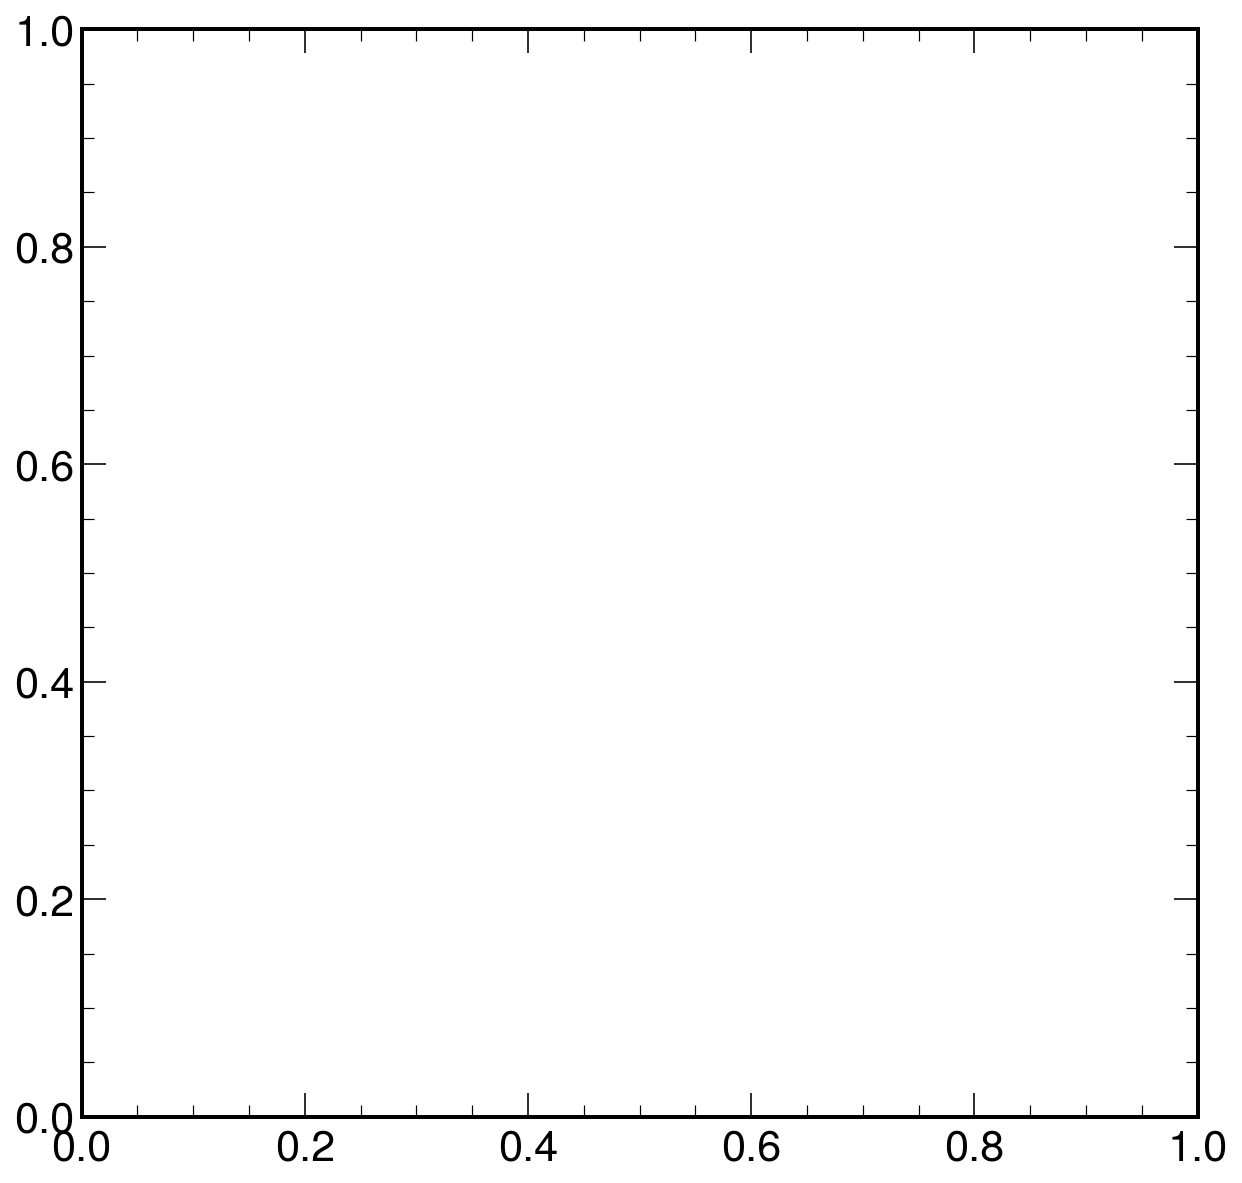

In [28]:
for step in [['L2Calo', 'L2', 'EFCalo', 'HLT'][3]]:
    plot_path = '/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad/et'

    chain_list = ['e24_lhtight_nod0_{RINGER}_ivarloose',
                  'e26_lhtight_nod0_{RINGER}_ivarloose',
                  'e60_lhmedium_nod0_{RINGER}_L1EM24VHI',
                  'e140_lhloose_nod0_{RINGER}'
                 ]

    # bins = [4,7,10,15,20,25,30,35,40,45,50,60,80,150,300] # et bins
    bins = np.linspace(4,300,100).tolist()
    
    for chain in chain_list:
        chain = step + '_' + chain
        print('Processing %s ...' %(chain))
        
        # create quadrant tables
        #first_quad = table.loc[(table[chain.format(RINGER = alg1)]==1) & (table[chain.format(RINGER = alg2)]==1)]['el_et']/1000
        #second_quad = table.loc[(table[chain.format(RINGER = alg1)] !=1) & (table[chain.format(RINGER = alg2)] ==1)]['el_et']/1000
        #third_quad = table.loc[(table[chain.format(RINGER = alg1)] !=1) & (table[chain.format(RINGER = alg2)] !=1)]['el_et']/1000
        #fourth_quad = table.loc[(table[chain.format(RINGER = alg1)] ==1) & (table[chain.format(RINGER = alg2)] !=1)]['el_et']/1000
        
        # calculate counts for each quad
        ## constructing the tables here helps in saving memory
        [count_total, bins, nome] = plt.hist(table['el_et']/1000, bins=bins)
        [count_first, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = alg1)]==1) & (table[chain.format(RINGER = alg2)]==1)]['el_et']/1000, bins=bins)
        [count_second, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = alg1)] !=1) & (table[chain.format(RINGER = alg2)] ==1)]['el_et']/1000, bins=bins)
        [count_third, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = alg1)] !=1) & (table[chain.format(RINGER = alg2)] !=1)]['el_et']/1000, bins=bins)
        [count_fourth, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = alg1)] ==1) & (table[chain.format(RINGER = alg2)] !=1)]['el_et']/1000, bins=bins)
        plt.clf()

        # create fig
        fig = plt.figure(figsize = (20,20), constrained_layout=False)
        gs = fig.add_gridspec(nrows=3, ncols=1)
        ax0 = fig.add_subplot(gs[:-1])
        ax1 = fig.add_subplot(gs[-1])
        
        # plot each quad
        ax0.plot(bins[:-1], np.log10(count_first), 'o', color = 'black', label='Both approve')
        ax0.plot(bins[:-1], np.log10(count_second), 'o', color = 'red', label='First reject')
        ax0.plot(bins[:-1], np.log10(count_third), 'o', color = 'grey', label='Both reject')
        ax0.plot(bins[:-1], np.log10(count_fourth), 'o', color = 'blue', label='Second reject')
        ax0.set(ylabel='Count [$log_{10}$]')
        ax0.legend(frameon=True, framealpha=True)
        ax0.grid()
        
        # plot disagreement
        ax1.plot(bins[:-1], count_second/count_total*100, 'o', color = 'red', label = 'First reject')
        ax1.plot(bins[:-1], count_fourth/count_total*100, 'o', color = 'blue', label = 'Second reject')
        ax1.text(175, count_second[-1]/count_total[-1]*100, '%s_%s_%s_nod0' %(step, chain.split('_')[1], chain.split('_')[2]))
        ax1.set(ylabel='Disagreement [%]', xlabel='$E_T$ [GeV]')

        # save fig
        print('Saving ' + plot_path + '/quad_et_%s_%s_%s ...'%(file_name, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path + '/quad_et_%s_%s_%s.png'%(file_name, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path + '/quad_et_%s_%s_%s.pdf'%(file_name, chain.split('_')[0], chain.split('_')[1]))
        fig.show()

### Quads for $\eta$

In [ ]:
for step in [['L2Calo', 'L2', 'EFCalo', 'HLT'][3]]:
    plot_path = '/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad/eta'

    chain_list = ['e24_lhtight_nod0_{RINGER}_ivarloose',
                  'e26_lhtight_nod0_{RINGER}_ivarloose',
                  'e60_lhmedium_nod0_{RINGER}_L1EM24VHI',
                  'e140_lhloose_nod0_{RINGER}'
                 ]

    bins = [-2.47,-2.37,-2.01,-1.81,-1.52,-1.37,-1.15,-0.80,-0.60,-0.10,0.00,0.10, 0.60, 0.80, 1.15, 1.37, 1.52, 1.81, 2.01, 2.37, 2.47] # eta bins
    #bins = np.linspace(4,300,100).tolist()
    
    for chain in chain_list:
        chain = step + '_' + chain
        print('Processing %s ...' %(chain))
        
        # create quadrant tables
        #first_quad = table.loc[(table[chain.format(RINGER = alg1)]==1) & (table[chain.format(RINGER = alg2)]==1)]['el_eta']
        #second_quad = table.loc[(table[chain.format(RINGER = alg1)] !=1) & (table[chain.format(RINGER = alg2)] ==1)]['el_eta']
        #third_quad = table.loc[(table[chain.format(RINGER = alg1)] !=1) & (table[chain.format(RINGER = alg2)] !=1)]['el_eta']
        #fourth_quad = table.loc[(table[chain.format(RINGER = alg1)] ==1) & (table[chain.format(RINGER = alg2)] !=1)]['el_eta']
        
        # calculate counts for each quad
        ## constructing the tables here helps in saving memory
        [count_total, bins, nome] = plt.hist(table['el_eta'], bins=bins)
        [count_first, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = alg1)]==1) & (table[chain.format(RINGER = alg2)]==1)]['el_eta'], bins=bins)
        [count_second, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = alg1)] !=1) & (table[chain.format(RINGER = alg2)] ==1)]['el_eta'], bins=bins)
        [count_third, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = alg1)] !=1) & (table[chain.format(RINGER = alg2)] !=1)]['el_eta'], bins=bins)
        [count_fourth, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = alg1)] ==1) & (table[chain.format(RINGER = alg2)] !=1)]['el_eta'], bins=bins)
        plt.clf()

        # create fig
        fig = plt.figure(figsize = (20,20), constrained_layout=False)
        gs = fig.add_gridspec(nrows=3, ncols=1)
        ax0 = fig.add_subplot(gs[:-1])
        ax1 = fig.add_subplot(gs[-1])
        
        # plot each quad
        ax0.plot(bins[:-1], np.log10(count_first), 'o', color = 'black', label='Both approve')
        ax0.plot(bins[:-1], np.log10(count_second), 'o', color = 'red', label='First reject')
        ax0.plot(bins[:-1], np.log10(count_third), 'o', color = 'grey', label='Both reject')
        ax0.plot(bins[:-1], np.log10(count_fourth), 'o', color = 'blue', label='Second reject')
        ax0.set(ylabel='Count [$log_{10}$]')
        ax0.legend(frameon=True, framealpha=True)
        ax0.grid()
        
        # plot disagreement
        ax1.plot(bins[:-1], count_second/count_total*100, 'o', color = 'red', label = 'First reject')
        ax1.plot(bins[:-1], count_fourth/count_total*100, 'o', color = 'blue', label = 'Second reject')
        ax1.text(0, count_second[-1]/count_total[-1]*100, '%s_%s_%s_nod0' %(step, chain.split('_')[1], chain.split('_')[2]))
        ax1.set(ylabel='Disagreement [%]', xlabel='$\eta$')

        # save fig
        print('Saving ' + plot_path + '/quad_eta_%s_%s_%s ...'%(file_name, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path + '/quad_eta_%s_%s_%s.png'%(file_name, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path + '/quad_eta_%s_%s_%s.pdf'%(file_name, chain.split('_')[0], chain.split('_')[1]))
        fig.show()

### Quads for $pT$

In [ ]:
for step in [['L2Calo', 'L2', 'EFCalo', 'HLT'][3]]:
    plot_path = '/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad/pt'

    chain_list = ['e24_lhtight_nod0_{RINGER}_ivarloose',
                  'e26_lhtight_nod0_{RINGER}_ivarloose',
                  'e60_lhmedium_nod0_{RINGER}_L1EM24VHI',
                  'e140_lhloose_nod0_{RINGER}'
                 ]

    bins = np.arange(0, 2000*10**3//2, step=50*10**3).tolist() # pt bins
    #bins = np.linspace(4,300,100).tolist()
    
    for chain in chain_list:
        
        
        chain = step + '_' + chain
        print('Processing %s ...' %(chain))
        
        # create quadrant tables
        #first_quad = table.loc[(table[chain.format(RINGER = alg1)]==1) & (table[chain.format(RINGER = alg2)]==1)]['el_eta']
        #second_quad = table.loc[(table[chain.format(RINGER = alg1)] !=1) & (table[chain.format(RINGER = alg2)] ==1)]['el_eta']
        #third_quad = table.loc[(table[chain.format(RINGER = alg1)] !=1) & (table[chain.format(RINGER = alg2)] !=1)]['el_eta']
        #fourth_quad = table.loc[(table[chain.format(RINGER = alg1)] ==1) & (table[chain.format(RINGER = alg2)] !=1)]['el_eta']
        
        # calculate counts for each quad
        ## constructing the tables here helps in saving memory
        [count_total, bins, nome] = plt.hist(table['trig_L2_el_pt'], bins=bins)
        [count_first, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = alg1)]==1) & (table[chain.format(RINGER = alg2)]==1)]['trig_L2_el_pt'], bins=bins)
        [count_second, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = alg1)] !=1) & (table[chain.format(RINGER = alg2)] ==1)]['trig_L2_el_pt'], bins=bins)
        [count_third, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = alg1)] !=1) & (table[chain.format(RINGER = alg2)] !=1)]['trig_L2_el_pt'], bins=bins)
        [count_fourth, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = alg1)] ==1) & (table[chain.format(RINGER = alg2)] !=1)]['trig_L2_el_pt'], bins=bins)
        plt.clf()

        # create fig
        fig = plt.figure(figsize = (20,20), constrained_layout=False)
        gs = fig.add_gridspec(nrows=3, ncols=1)
        ax0 = fig.add_subplot(gs[:-1])
        ax1 = fig.add_subplot(gs[-1])
        
        # plot each quad
        ax0.plot(bins[:-1], np.log10(count_first), 'o', color = 'black', label='Both approve')
        ax0.plot(bins[:-1], np.log10(count_second), 'o', color = 'red', label='First reject')
        ax0.plot(bins[:-1], np.log10(count_third), 'o', color = 'grey', label='Both reject')
        ax0.plot(bins[:-1], np.log10(count_fourth), 'o', color = 'blue', label='Second reject')
        ax0.set(ylabel='Count [$log_{10}$]')
        ax0.legend(frameon=True, framealpha=True)
        ax0.grid()
        
        # plot disagreement
        ax1.plot(bins[:-1], count_second/count_total*100, 'o', color = 'red', label = 'First reject')
        ax1.plot(bins[:-1], count_fourth/count_total*100, 'o', color = 'blue', label = 'Second reject')
        ax1.text(100*10**3, count_second[-1]/count_total[-1]*100, '%s_%s_%s_nod0' %(step, chain.split('_')[1], chain.split('_')[2]))
        ax1.set(ylabel='Disagreement [%]', xlabel='$pT$')

        # save fig
        print('Saving ' + plot_path + '/quad_pt_%s_%s_%s ...'%(file_name, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path + '/quad_pt_%s_%s_%s.png'%(file_name, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path + '/quad_pt_%s_%s_%s.pdf'%(file_name, chain.split('_')[0], chain.split('_')[1]))
        fig.show()

### Quads for $<\mu>$

In [ ]:
for step in [['L2Calo', 'L2', 'EFCalo', 'HLT'][3]]:
    plot_path = '/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad/mu'

    chain_list = ['e24_lhtight_nod0_{RINGER}_ivarloose',
                  'e26_lhtight_nod0_{RINGER}_ivarloose',
                  'e60_lhmedium_nod0_{RINGER}_L1EM24VHI',
                  'e140_lhloose_nod0_{RINGER}'
                 ]

    bins = [10, 20, 30, 40, 50, 60, 70] # mu bins
    #bins = np.linspace(4,300,100).tolist()
    
    for chain in chain_list:
        chain = step + '_' + chain
        print('Processing %s ...' %(chain))
        
        # create quadrant tables
        #first_quad = table.loc[(table[chain.format(RINGER = alg1)]==1) & (table[chain.format(RINGER = alg2)]==1)]['el_eta']
        #second_quad = table.loc[(table[chain.format(RINGER = alg1)] !=1) & (table[chain.format(RINGER = alg2)] ==1)]['el_eta']
        #third_quad = table.loc[(table[chain.format(RINGER = alg1)] !=1) & (table[chain.format(RINGER = alg2)] !=1)]['el_eta']
        #fourth_quad = table.loc[(table[chain.format(RINGER = alg1)] ==1) & (table[chain.format(RINGER = alg2)] !=1)]['el_eta']
        
        # calculate counts for each quad
        ## constructing the tables here helps in saving memory
        [count_total, bins, nome] = plt.hist(table['avgmu'], bins=bins)
        [count_first, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = alg1)]==1) & (table[chain.format(RINGER = alg2)]==1)]['avgmu'], bins=bins)
        [count_second, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = alg1)] !=1) & (table[chain.format(RINGER = alg2)] ==1)]['avgmu'], bins=bins)
        [count_third, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = alg1)] !=1) & (table[chain.format(RINGER = alg2)] !=1)]['avgmu'], bins=bins)
        [count_fourth, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = alg1)] ==1) & (table[chain.format(RINGER = alg2)] !=1)]['avgmu'], bins=bins)
        plt.clf()

        # create fig
        fig = plt.figure(figsize = (20,20), constrained_layout=False)
        gs = fig.add_gridspec(nrows=3, ncols=1)
        ax0 = fig.add_subplot(gs[:-1])
        ax1 = fig.add_subplot(gs[-1])
        
        # plot each quad
        ax0.plot(bins[:-1], np.log10(count_first), 'o', color = 'black', label='Both approve')
        ax0.plot(bins[:-1], np.log10(count_second), 'o', color = 'red', label='First reject')
        ax0.plot(bins[:-1], np.log10(count_third), 'o', color = 'grey', label='Both reject')
        ax0.plot(bins[:-1], np.log10(count_fourth), 'o', color = 'blue', label='Second reject')
        ax0.set(ylabel='Count [$log_{10}$]')
        ax0.legend(frameon=True, framealpha=True)
        ax0.grid()
        
        # plot disagreement
        ax1.plot(bins[:-1], count_second/count_total*100, 'o', color = 'red', label = 'First reject')
        ax1.plot(bins[:-1], count_fourth/count_total*100, 'o', color = 'blue', label = 'Second reject')
        ax1.text(bins[len(bins)//4], count_second[-1]/count_total[-1]*100, '%s_%s_%s_nod0' %(step, chain.split('_')[1], chain.split('_')[2]))
        ax1.set(ylabel='Disagreement [%]', xlabel='$<\mu>$')

        # save fig
        print('Saving ' + plot_path + '/quad_mu_%s_%s_%s ...'%(file_name, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path + '/quad_mu_%s_%s_%s.png'%(file_name, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path + '/quad_mu_%s_%s_%s.pdf'%(file_name, chain.split('_')[0], chain.split('_')[1]))
        fig.show()

### Quads for $R_{\eta}$

Processing HLT_e24_lhtight_nod0_{RINGER}_ivarloose ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad/reta/quad_reta_v12xv14_HLT_e24 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Processing HLT_e26_lhtight_nod0_{RINGER}_ivarloose ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad/reta/quad_reta_v12xv14_HLT_e26 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Processing HLT_e60_lhmedium_nod0_{RINGER}_L1EM24VHI ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad/reta/quad_reta_v12xv14_HLT_e60 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Processing HLT_e140_lhloose_nod0_{RINGER} ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad/reta/quad_reta_v12xv14_HLT_e140 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


<Figure size 720x720 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

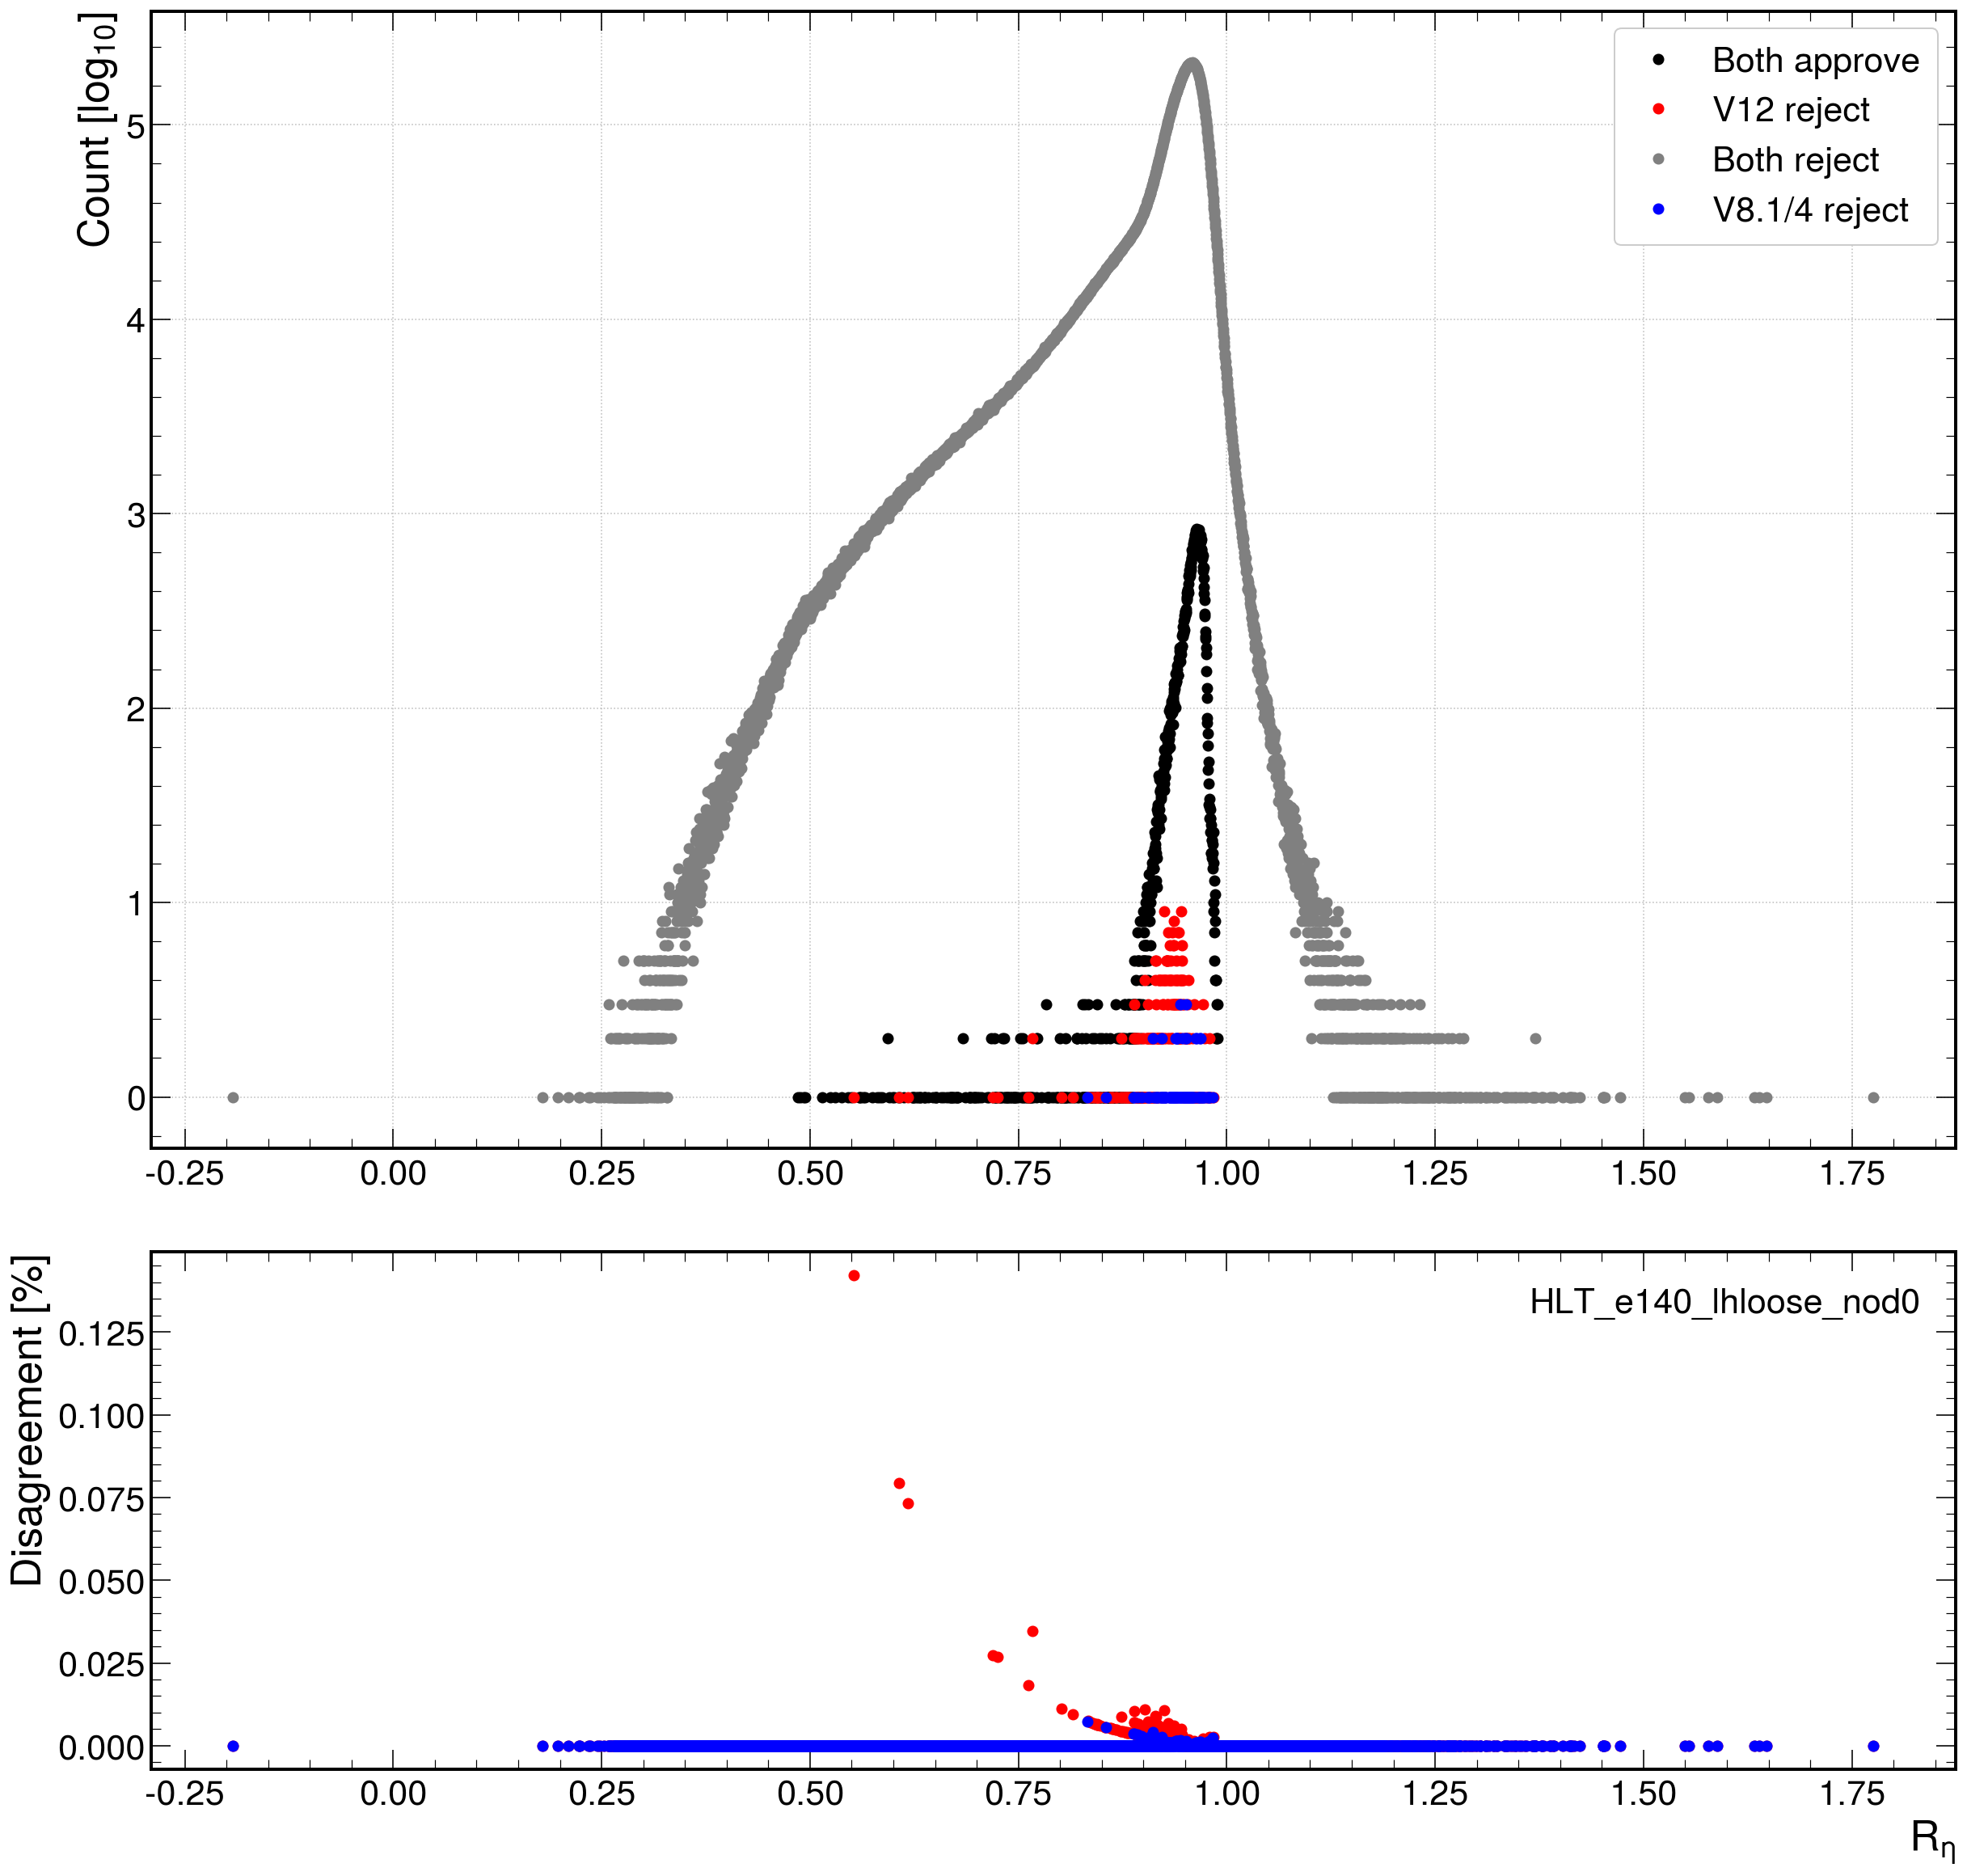

In [53]:
var = 'trig_L2_cl_reta'

for step in [['L2Calo', 'L2', 'EFCalo', 'HLT'][3]]:
    plot_path = '/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad/reta'

    chain_list = ['e24_lhtight_nod0_{RINGER}_ivarloose',
                  'e26_lhtight_nod0_{RINGER}_ivarloose',
                  'e60_lhmedium_nod0_{RINGER}_L1EM24VHI',
                  'e140_lhloose_nod0_{RINGER}'
                 ]

    bins = int(np.sqrt(table.shape[0]))
    
    for chain in chain_list:
        chain = step + '_' + chain
        print('Processing %s ...' %(chain))
        
        # create quadrant tables
        #first_quad = table.loc[(table[chain.format(RINGER = alg1)]==1) & (table[chain.format(RINGER = alg2)]==1)]['el_eta']
        #second_quad = table.loc[(table[chain.format(RINGER = alg1)] !=1) & (table[chain.format(RINGER = alg2)] ==1)]['el_eta']
        #third_quad = table.loc[(table[chain.format(RINGER = alg1)] !=1) & (table[chain.format(RINGER = alg2)] !=1)]['el_eta']
        #fourth_quad = table.loc[(table[chain.format(RINGER = alg1)] ==1) & (table[chain.format(RINGER = alg2)] !=1)]['el_eta']
        
        # calculate counts for each quad
        ## constructing the tables here helps in saving memory
        [count_total, bins, nome]  = plt.hist(table.loc[table[var]<2][var], bins=bins)
        [count_first, bins, nome]  = plt.hist(table.loc[(table[chain.format(RINGER = alg1)] ==1) & (table[chain.format(RINGER = alg2)] ==1) & (table[var]<2)][var], bins=bins)
        [count_second, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = alg1)] !=1) & (table[chain.format(RINGER = alg2)] ==1) & (table[var]<2)][var], bins=bins)
        [count_third, bins, nome]  = plt.hist(table.loc[(table[chain.format(RINGER = alg1)] !=1) & (table[chain.format(RINGER = alg2)] !=1) & (table[var]<2)][var], bins=bins)
        [count_fourth, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = alg1)] ==1) & (table[chain.format(RINGER = alg2)] !=1) & (table[var]<2)][var], bins=bins)
        plt.clf()

        # create fig
        fig = plt.figure(figsize = (20,20), constrained_layout=False)
        gs = fig.add_gridspec(nrows=3, ncols=1)
        ax0 = fig.add_subplot(gs[:-1])
        ax1 = fig.add_subplot(gs[-1])
        
        # plot each quad
        ax0.plot(bins[:-1], np.log10(count_first), 'o', color = 'black', label='Both approve')
        ax0.plot(bins[:-1], np.log10(count_second), 'o', color = 'red', label=lbl1)
        ax0.plot(bins[:-1], np.log10(count_third), 'o', color = 'grey', label='Both reject')
        ax0.plot(bins[:-1], np.log10(count_fourth), 'o', color = 'blue', label=lbl2)
        ax0.set(ylabel='Count [$log_{10}$]')
        ax0.legend(frameon=True, framealpha=True)
        ax0.grid()
        
        # plot disagreement
        ax1.plot(bins[1], count_second[1]/count_total[1]*100, 'o', color = (0,0,0,0))
        ax1.plot(bins[:-1], count_second/count_total*100, 'o', color = 'red', label = lbl1)
        ax1.plot(bins[:-1], count_fourth/count_total*100, 'o', color = 'blue', label = lbl2)
        ax1.legend(['%s_%s_%s_nod0' %(step, chain.split('_')[1], chain.split('_')[2])], loc='best')
        ax1.set(ylabel='Disagreement [%]', xlabel='$R_{\eta}$')

        # save fig
        print('Saving ' + plot_path + '/quad_reta_%s_%s_%s ...'%(file_name, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path + '/quad_reta_%s_%s_%s.png'%(file_name, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path + '/quad_reta_%s_%s_%s.pdf'%(file_name, chain.split('_')[0], chain.split('_')[1]))
        fig.show()

### Quads for $E_{ratio}$

Processing HLT_e24_lhtight_nod0_{RINGER}_ivarloose ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad/eratio/quad_eratio_v12xv14_HLT_e24 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Processing HLT_e26_lhtight_nod0_{RINGER}_ivarloose ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad/eratio/quad_eratio_v12xv14_HLT_e26 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Processing HLT_e60_lhmedium_nod0_{RINGER}_L1EM24VHI ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad/eratio/quad_eratio_v12xv14_HLT_e60 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Processing HLT_e140_lhloose_nod0_{RINGER} ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad/eratio/quad_eratio_v12xv14_HLT_e140 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


<Figure size 720x720 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

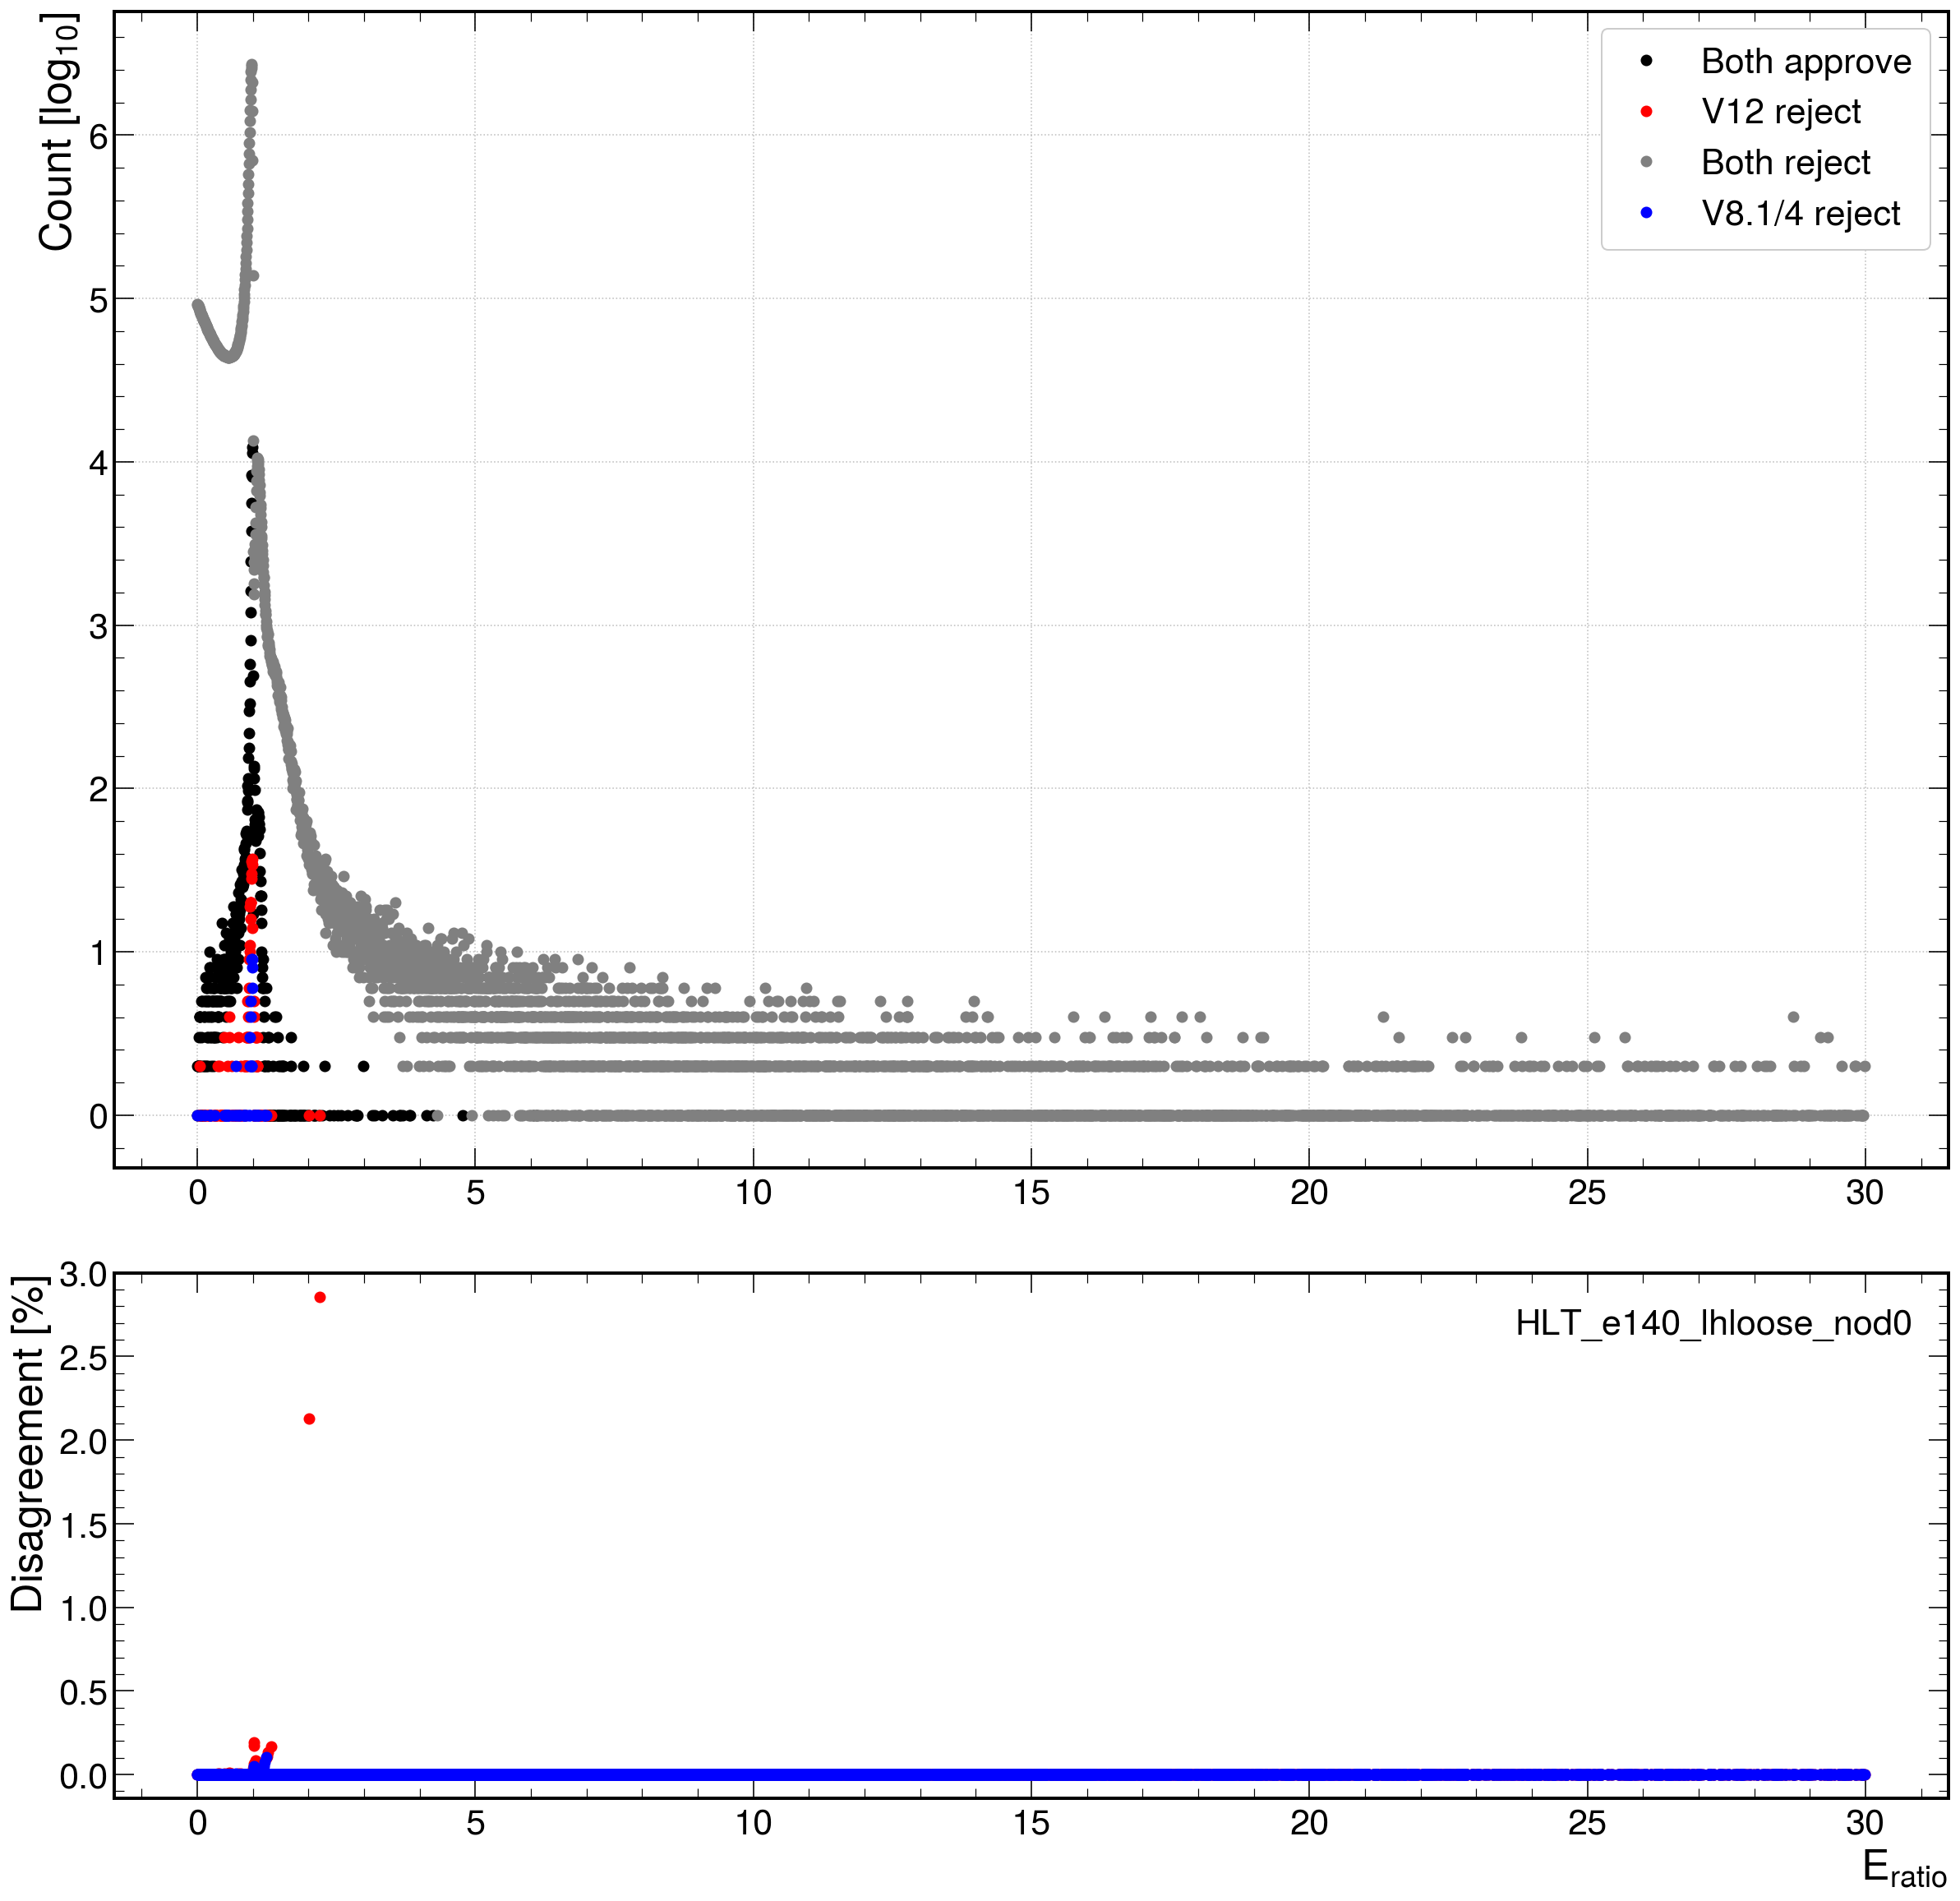

In [54]:
var = 'trig_L2_cl_eratio'

for step in [['L2Calo', 'L2', 'EFCalo', 'HLT'][3]]:
    plot_path = '/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad/eratio'

    chain_list = ['e24_lhtight_nod0_{RINGER}_ivarloose',
                  'e26_lhtight_nod0_{RINGER}_ivarloose',
                  'e60_lhmedium_nod0_{RINGER}_L1EM24VHI',
                  'e140_lhloose_nod0_{RINGER}'
                 ]

    bins = int(np.sqrt(table.shape[0]))
    
    for chain in chain_list:
        chain = step + '_' + chain
        print('Processing %s ...' %(chain))
        
        # create quadrant tables
        #first_quad = table.loc[(table[chain.format(RINGER = alg1)]==1) & (table[chain.format(RINGER = alg2)]==1)]['el_eta']
        #second_quad = table.loc[(table[chain.format(RINGER = alg1)] !=1) & (table[chain.format(RINGER = alg2)] ==1)]['el_eta']
        #third_quad = table.loc[(table[chain.format(RINGER = alg1)] !=1) & (table[chain.format(RINGER = alg2)] !=1)]['el_eta']
        #fourth_quad = table.loc[(table[chain.format(RINGER = alg1)] ==1) & (table[chain.format(RINGER = alg2)] !=1)]['el_eta']
        
        # calculate counts for each quad
        ## constructing the tables here helps in saving memory
        [count_total, bins, nome]  = plt.hist(table.loc[table[var]<30][var], bins=bins)
        [count_first, bins, nome]  = plt.hist(table.loc[(table[chain.format(RINGER = alg1)] ==1) & (table[chain.format(RINGER = alg2)] ==1) & (table[var]<30)][var], bins=bins)
        [count_second, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = alg1)] !=1) & (table[chain.format(RINGER = alg2)] ==1) & (table[var]<30)][var], bins=bins)
        [count_third, bins, nome]  = plt.hist(table.loc[(table[chain.format(RINGER = alg1)] !=1) & (table[chain.format(RINGER = alg2)] !=1) & (table[var]<30)][var], bins=bins)
        [count_fourth, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = alg1)] ==1) & (table[chain.format(RINGER = alg2)] !=1) & (table[var]<30)][var], bins=bins)
        plt.clf()

        # create fig
        fig = plt.figure(figsize = (20,20), constrained_layout=False)
        gs = fig.add_gridspec(nrows=3, ncols=1)
        ax0 = fig.add_subplot(gs[:-1])
        ax1 = fig.add_subplot(gs[-1])
        
        # plot each quad
        ax0.plot(bins[:-1], np.log10(count_first), 'o', color = 'black', label='Both approve')
        ax0.plot(bins[:-1], np.log10(count_second), 'o', color = 'red', label=lbl1)
        ax0.plot(bins[:-1], np.log10(count_third), 'o', color = 'grey', label='Both reject')
        ax0.plot(bins[:-1], np.log10(count_fourth), 'o', color = 'blue', label=lbl2)
        ax0.set(ylabel='Count [$log_{10}$]')
        ax0.legend(frameon=True, framealpha=True)
        ax0.grid()
        
        # plot disagreement
        ax1.plot(bins[1], count_second[1]/count_total[1]*100, 'o', color = (0,0,0,0))
        ax1.plot(bins[:-1], count_second/count_total*100, 'o', color = 'red', label = lbl1)
        ax1.plot(bins[:-1], count_fourth/count_total*100, 'o', color = 'blue', label = lbl2)
        ax1.legend(['%s_%s_%s_nod0' %(step, chain.split('_')[1], chain.split('_')[2])], loc='best')
        ax1.set(ylabel='Disagreement [%]', xlabel='$E_{ratio}$')

        # save fig
        print('Saving ' + plot_path + '/quad_eratio_%s_%s_%s ...'%(file_name, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path + '/quad_eratio_%s_%s_%s.png'%(file_name, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path + '/quad_eratio_%s_%s_%s.pdf'%(file_name, chain.split('_')[0], chain.split('_')[1]))
        fig.show()

### Quads for $f_{1}$

Processing HLT_e24_lhtight_nod0_{RINGER}_ivarloose ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad/f1/quad_f1_v12xv14_HLT_e24 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Processing HLT_e26_lhtight_nod0_{RINGER}_ivarloose ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad/f1/quad_f1_v12xv14_HLT_e26 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Processing HLT_e60_lhmedium_nod0_{RINGER}_L1EM24VHI ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad/f1/quad_f1_v12xv14_HLT_e60 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Processing HLT_e140_lhloose_nod0_{RINGER} ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad/f1/quad_f1_v12xv14_HLT_e140 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


<Figure size 720x720 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

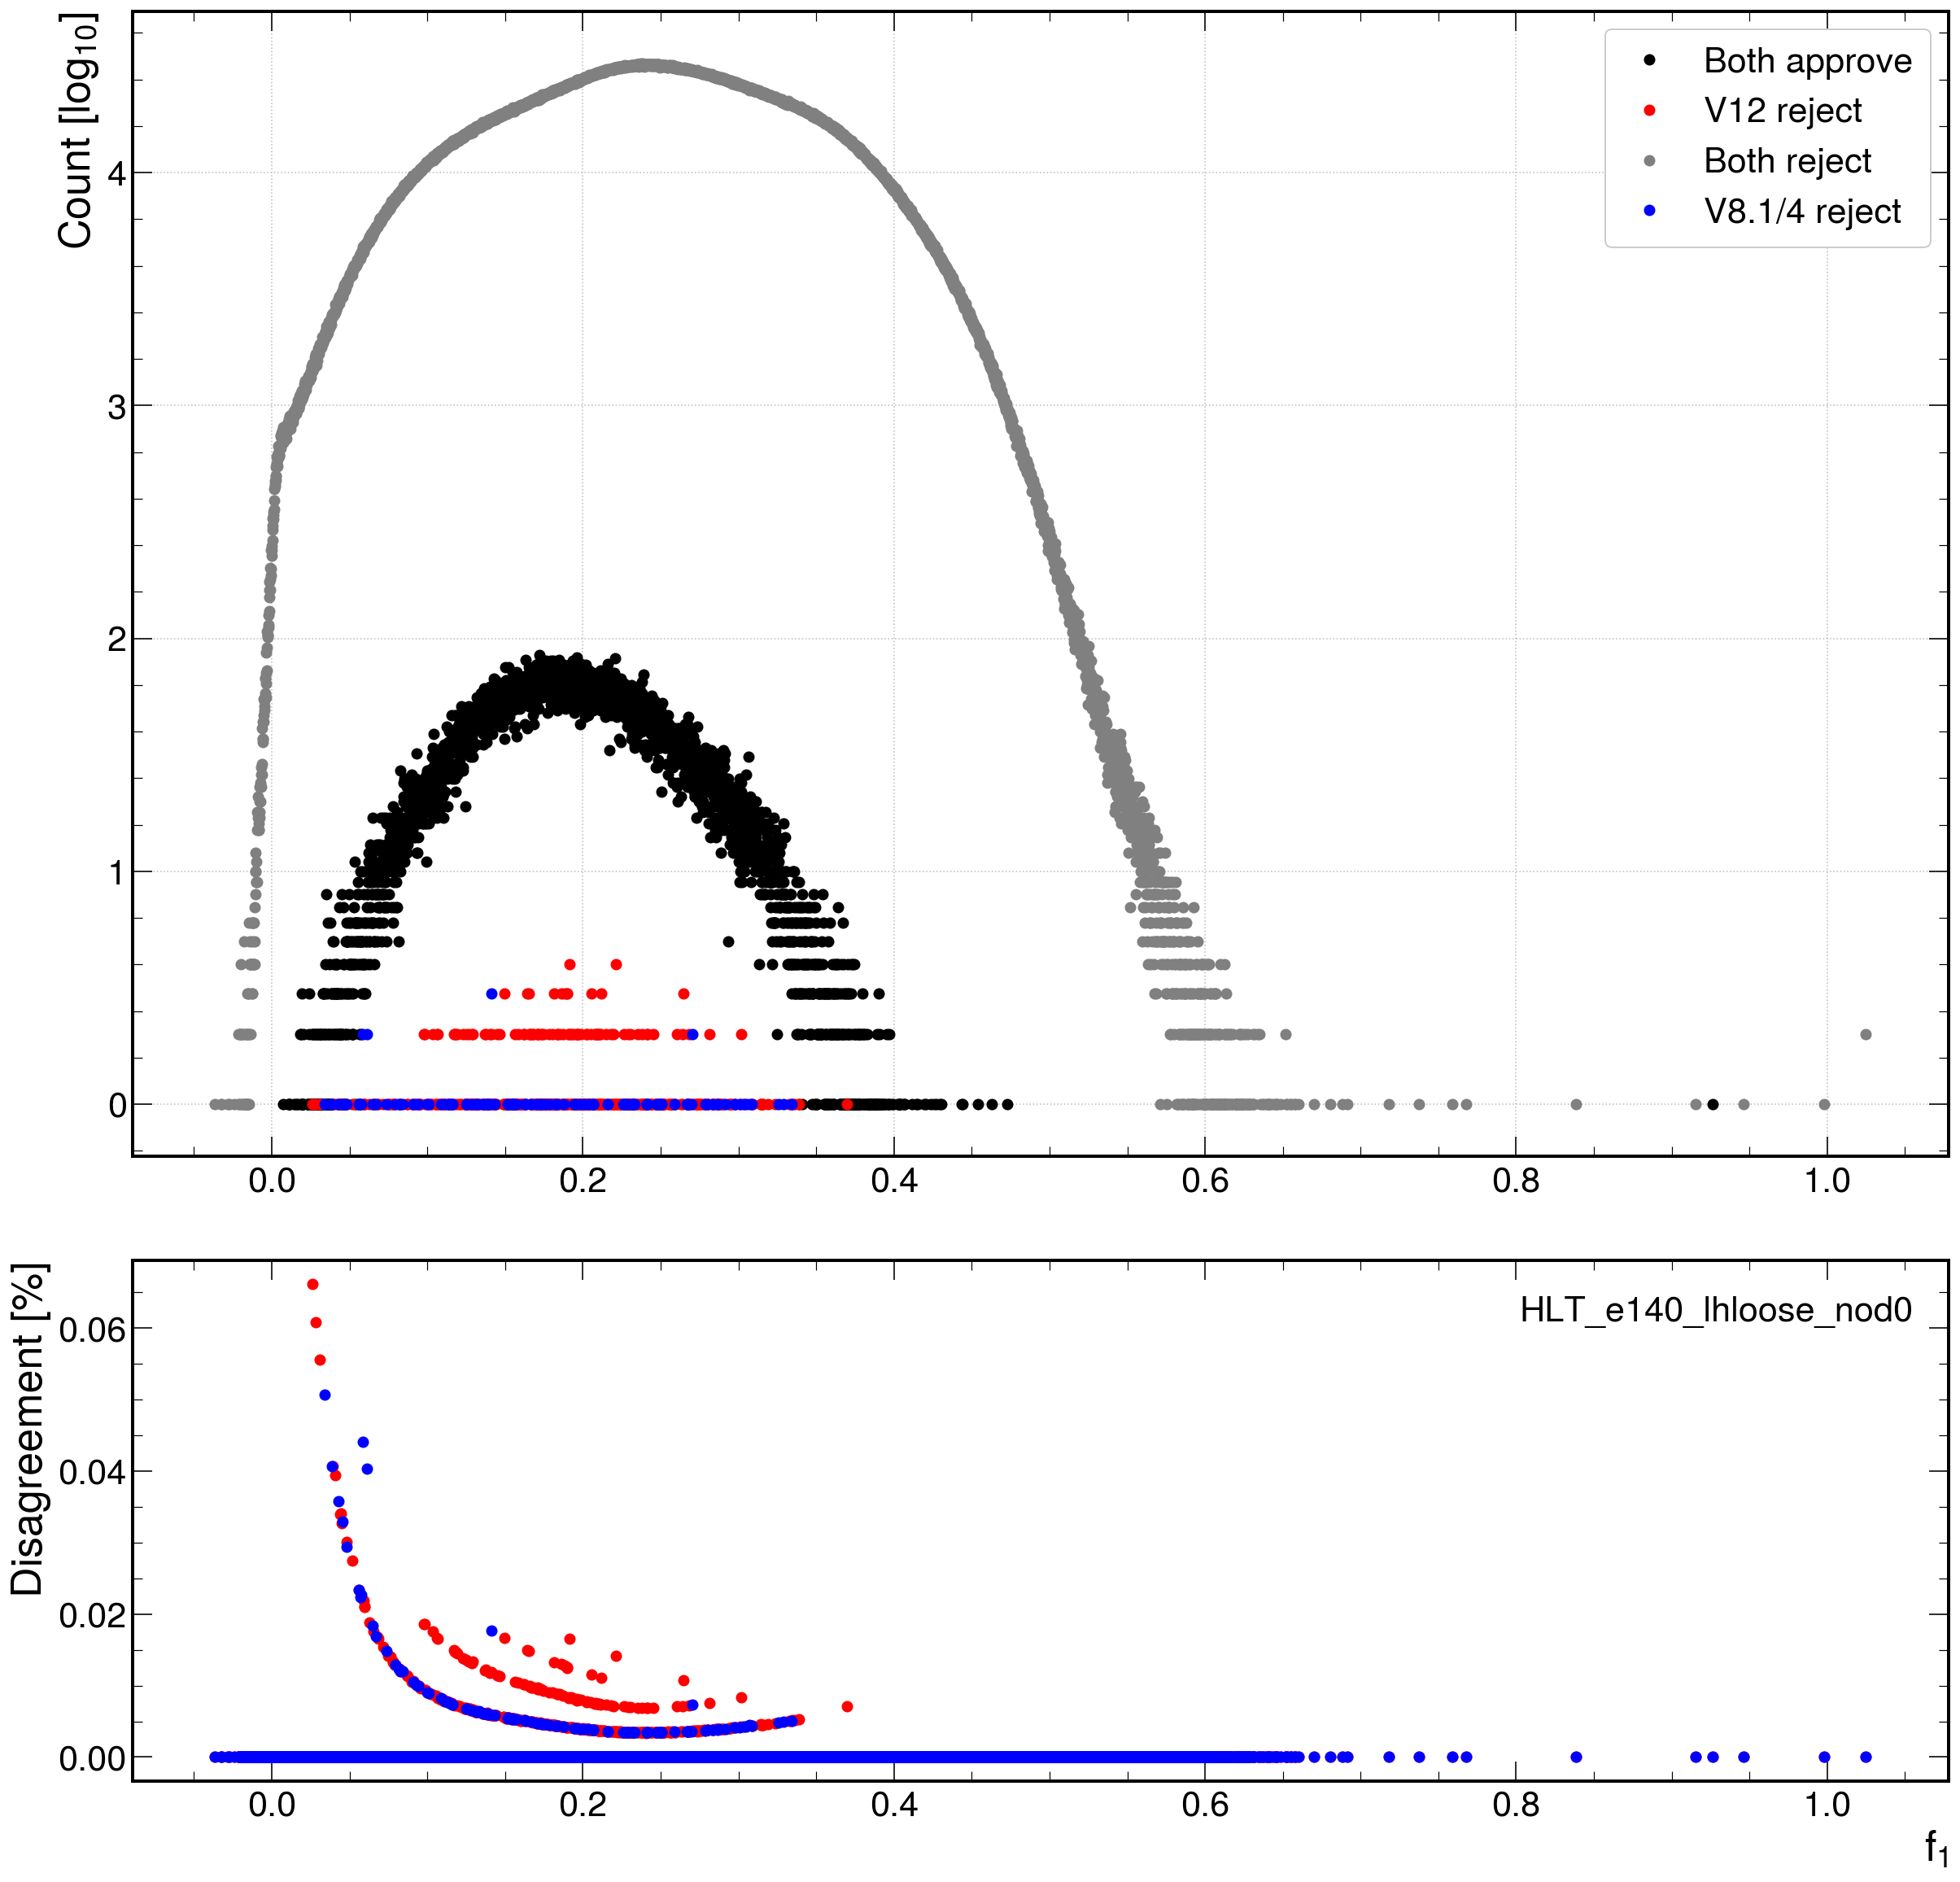

In [55]:
var = 'trig_L2_cl_f1'

for step in [['L2Calo', 'L2', 'EFCalo', 'HLT'][3]]:
    plot_path = '/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad/f1'

    chain_list = ['e24_lhtight_nod0_{RINGER}_ivarloose',
                  'e26_lhtight_nod0_{RINGER}_ivarloose',
                  'e60_lhmedium_nod0_{RINGER}_L1EM24VHI',
                  'e140_lhloose_nod0_{RINGER}'
                 ]

    bins = int(np.sqrt(table.shape[0]))
    
    for chain in chain_list:
        chain = step + '_' + chain
        print('Processing %s ...' %(chain))
        
        # create quadrant tables
        #first_quad = table.loc[(table[chain.format(RINGER = alg1)]==1) & (table[chain.format(RINGER = alg2)]==1)]['el_eta']
        #second_quad = table.loc[(table[chain.format(RINGER = alg1)] !=1) & (table[chain.format(RINGER = alg2)] ==1)]['el_eta']
        #third_quad = table.loc[(table[chain.format(RINGER = alg1)] !=1) & (table[chain.format(RINGER = alg2)] !=1)]['el_eta']
        #fourth_quad = table.loc[(table[chain.format(RINGER = alg1)] ==1) & (table[chain.format(RINGER = alg2)] !=1)]['el_eta']
        
        # calculate counts for each quad
        ## constructing the tables here helps in saving memory
        [count_total, bins, nome] = plt.hist(table[var], bins=bins)
        [count_first, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = alg1)]==1) & (table[chain.format(RINGER = alg2)]==1)][var], bins=bins)
        [count_second, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = alg1)] !=1) & (table[chain.format(RINGER = alg2)] ==1)][var], bins=bins)
        [count_third, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = alg1)] !=1) & (table[chain.format(RINGER = alg2)] !=1)][var], bins=bins)
        [count_fourth, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = alg1)] ==1) & (table[chain.format(RINGER = alg2)] !=1)][var], bins=bins)
        plt.clf()

        # create fig
        fig = plt.figure(figsize = (20,20), constrained_layout=False)
        gs = fig.add_gridspec(nrows=3, ncols=1)
        ax0 = fig.add_subplot(gs[:-1])
        ax1 = fig.add_subplot(gs[-1])
        
        # plot each quad
        ax0.plot(bins[:-1], np.log10(count_first), 'o', color = 'black', label='Both approve')
        ax0.plot(bins[:-1], np.log10(count_second), 'o', color = 'red', label=lbl1)
        ax0.plot(bins[:-1], np.log10(count_third), 'o', color = 'grey', label='Both reject')
        ax0.plot(bins[:-1], np.log10(count_fourth), 'o', color = 'blue', label=lbl2)
        ax0.set(ylabel='Count [$log_{10}$]')
        ax0.legend(frameon=True, framealpha=True)
        ax0.grid()
        
        # plot disagreement
        ax1.plot(bins[1], count_second[1]/count_total[1]*100, 'o', color = (0,0,0,0))
        ax1.plot(bins[:-1], count_second/count_total*100, 'o', color = 'red', label = lbl1)
        ax1.plot(bins[:-1], count_fourth/count_total*100, 'o', color = 'blue', label = lbl2)
        ax1.legend(['%s_%s_%s_nod0' %(step, chain.split('_')[1], chain.split('_')[2])], loc='best')
        ax1.set(ylabel='Disagreement [%]', xlabel='$f_{1}$')

        # save fig
        print('Saving ' + plot_path + '/quad_f1_%s_%s_%s ...'%(file_name, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path + '/quad_f1_%s_%s_%s.png'%(file_name, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path + '/quad_f1_%s_%s_%s.pdf'%(file_name, chain.split('_')[0], chain.split('_')[1]))
        fig.show()

### Quads for $f_{3}$

Processing HLT_e24_lhtight_nod0_{RINGER}_ivarloose ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad/f3/quad_f3_v12xv14_HLT_e24 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Processing HLT_e26_lhtight_nod0_{RINGER}_ivarloose ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad/f3/quad_f3_v12xv14_HLT_e26 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Processing HLT_e60_lhmedium_nod0_{RINGER}_L1EM24VHI ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad/f3/quad_f3_v12xv14_HLT_e60 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Processing HLT_e140_lhloose_nod0_{RINGER} ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad/f3/quad_f3_v12xv14_HLT_e140 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


<Figure size 720x720 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

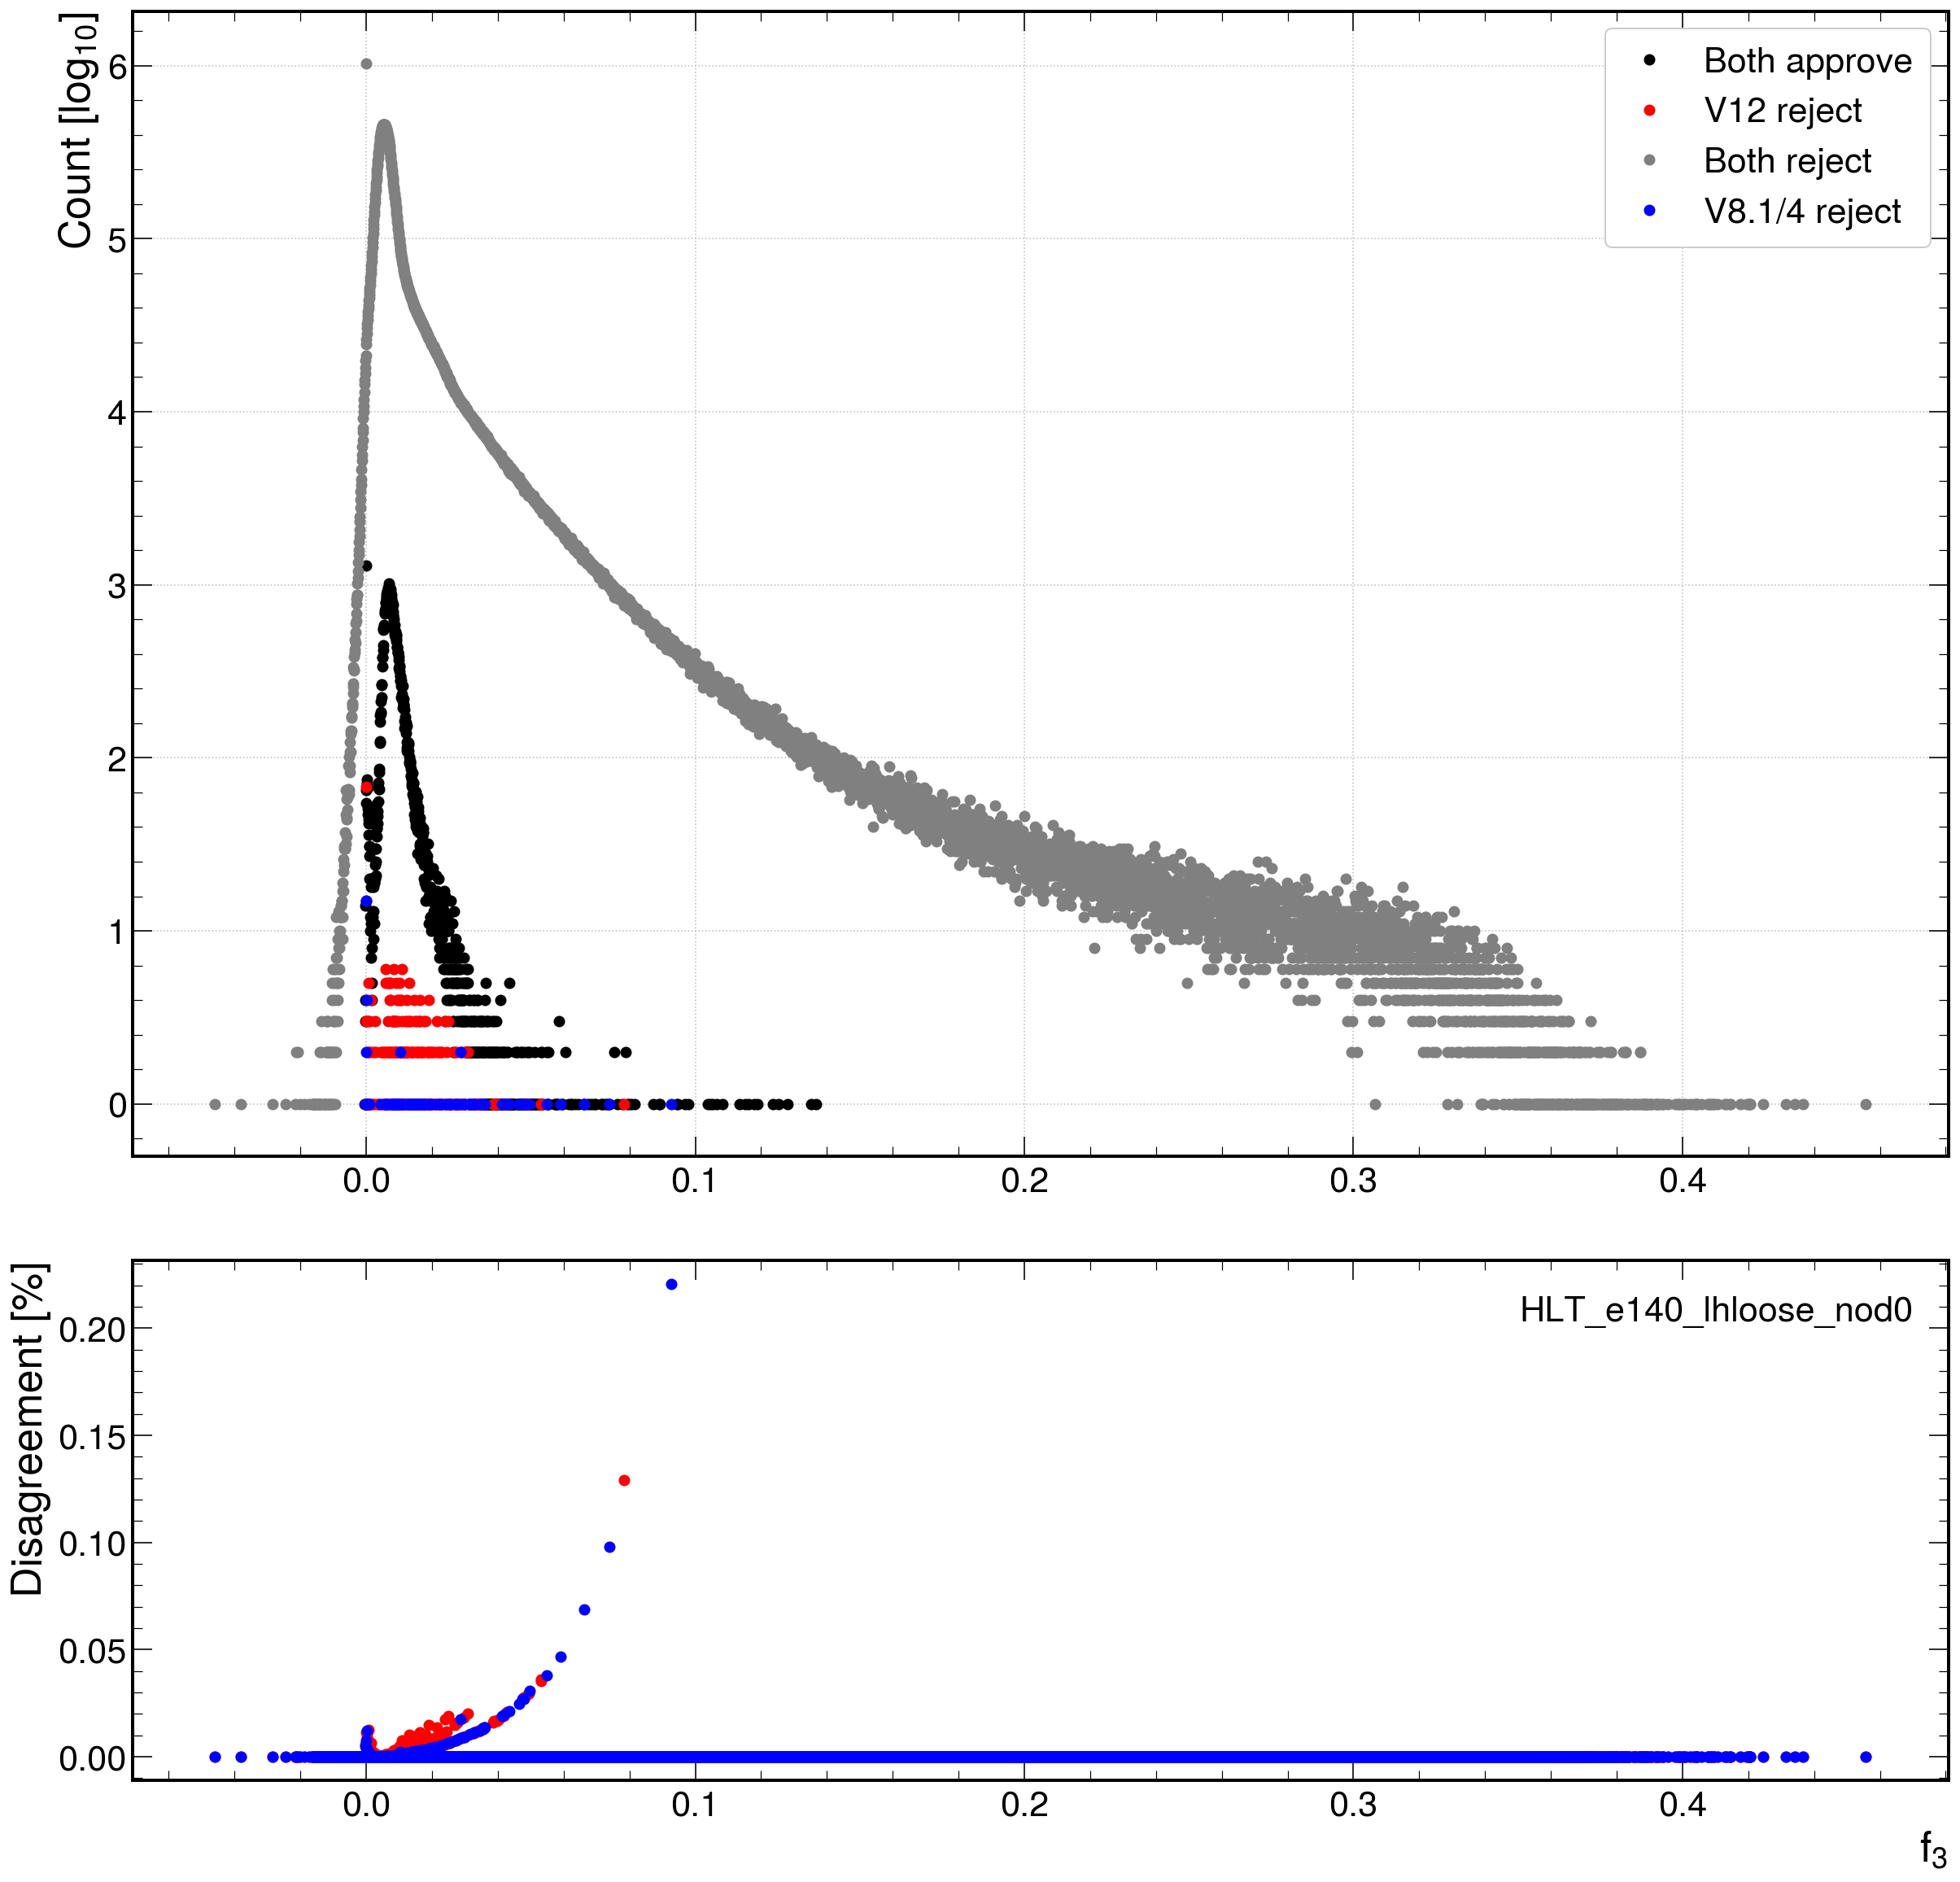

In [56]:
var = 'trig_L2_cl_f3'

for step in [['L2Calo', 'L2', 'EFCalo', 'HLT'][3]]:
    plot_path = '/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad/f3'

    chain_list = ['e24_lhtight_nod0_{RINGER}_ivarloose',
                  'e26_lhtight_nod0_{RINGER}_ivarloose',
                  'e60_lhmedium_nod0_{RINGER}_L1EM24VHI',
                  'e140_lhloose_nod0_{RINGER}'
                 ]

    bins = int(np.sqrt(table.shape[0]))
    
    for chain in chain_list:
        chain = step + '_' + chain
        print('Processing %s ...' %(chain))
        
        # create quadrant tables
        #first_quad = table.loc[(table[chain.format(RINGER = alg1)]==1) & (table[chain.format(RINGER = alg2)]==1)]['el_eta']
        #second_quad = table.loc[(table[chain.format(RINGER = alg1)] !=1) & (table[chain.format(RINGER = alg2)] ==1)]['el_eta']
        #third_quad = table.loc[(table[chain.format(RINGER = alg1)] !=1) & (table[chain.format(RINGER = alg2)] !=1)]['el_eta']
        #fourth_quad = table.loc[(table[chain.format(RINGER = alg1)] ==1) & (table[chain.format(RINGER = alg2)] !=1)]['el_eta']
        
        # calculate counts for each quad
        ## constructing the tables here helps in saving memory
        [count_total, bins, nome] = plt.hist(table[var], bins=bins)
        [count_first, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = alg1)]==1) & (table[chain.format(RINGER = alg2)]==1)][var], bins=bins)
        [count_second, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = alg1)] !=1) & (table[chain.format(RINGER = alg2)] ==1)][var], bins=bins)
        [count_third, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = alg1)] !=1) & (table[chain.format(RINGER = alg2)] !=1)][var], bins=bins)
        [count_fourth, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = alg1)] ==1) & (table[chain.format(RINGER = alg2)] !=1)][var], bins=bins)
        plt.clf()

        # create fig
        fig = plt.figure(figsize = (20,20), constrained_layout=False)
        gs = fig.add_gridspec(nrows=3, ncols=1)
        ax0 = fig.add_subplot(gs[:-1])
        ax1 = fig.add_subplot(gs[-1])
        
        # plot each quad
        ax0.plot(bins[:-1], np.log10(count_first), 'o', color = 'black', label='Both approve')
        ax0.plot(bins[:-1], np.log10(count_second), 'o', color = 'red', label=lbl1)
        ax0.plot(bins[:-1], np.log10(count_third), 'o', color = 'grey', label='Both reject')
        ax0.plot(bins[:-1], np.log10(count_fourth), 'o', color = 'blue', label=lbl2)
        ax0.set(ylabel='Count [$log_{10}$]')
        ax0.legend(frameon=True, framealpha=True)
        ax0.grid()
        
        # plot disagreement
        ax1.plot(bins[1], count_second[1]/count_total[1]*100, 'o', color = (0,0,0,0))
        ax1.plot(bins[:-1], count_second/count_total*100, 'o', color = 'red', label = lbl1)
        ax1.plot(bins[:-1], count_fourth/count_total*100, 'o', color = 'blue', label = lbl2)
        ax1.legend(['%s_%s_%s_nod0' %(step, chain.split('_')[1], chain.split('_')[2])], loc='best')
        ax1.set(ylabel='Disagreement [%]', xlabel='$f_{3}$')

        # save fig
        print('Saving ' + plot_path + '/quad_f3_%s_%s_%s ...'%(file_name, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path + '/quad_f3_%s_%s_%s.png'%(file_name, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path + '/quad_f3_%s_%s_%s.pdf'%(file_name, chain.split('_')[0], chain.split('_')[1]))
        fig.show()

### Quads for $w_{\eta}$

Processing HLT_e24_lhtight_nod0_{RINGER}_ivarloose ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad/weta/quad_weta_v12xv14_HLT_e24 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Processing HLT_e26_lhtight_nod0_{RINGER}_ivarloose ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad/weta/quad_weta_v12xv14_HLT_e26 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Processing HLT_e60_lhmedium_nod0_{RINGER}_L1EM24VHI ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad/weta/quad_weta_v12xv14_HLT_e60 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Processing HLT_e140_lhloose_nod0_{RINGER} ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad/weta/quad_weta_v12xv14_HLT_e140 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


<Figure size 720x720 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

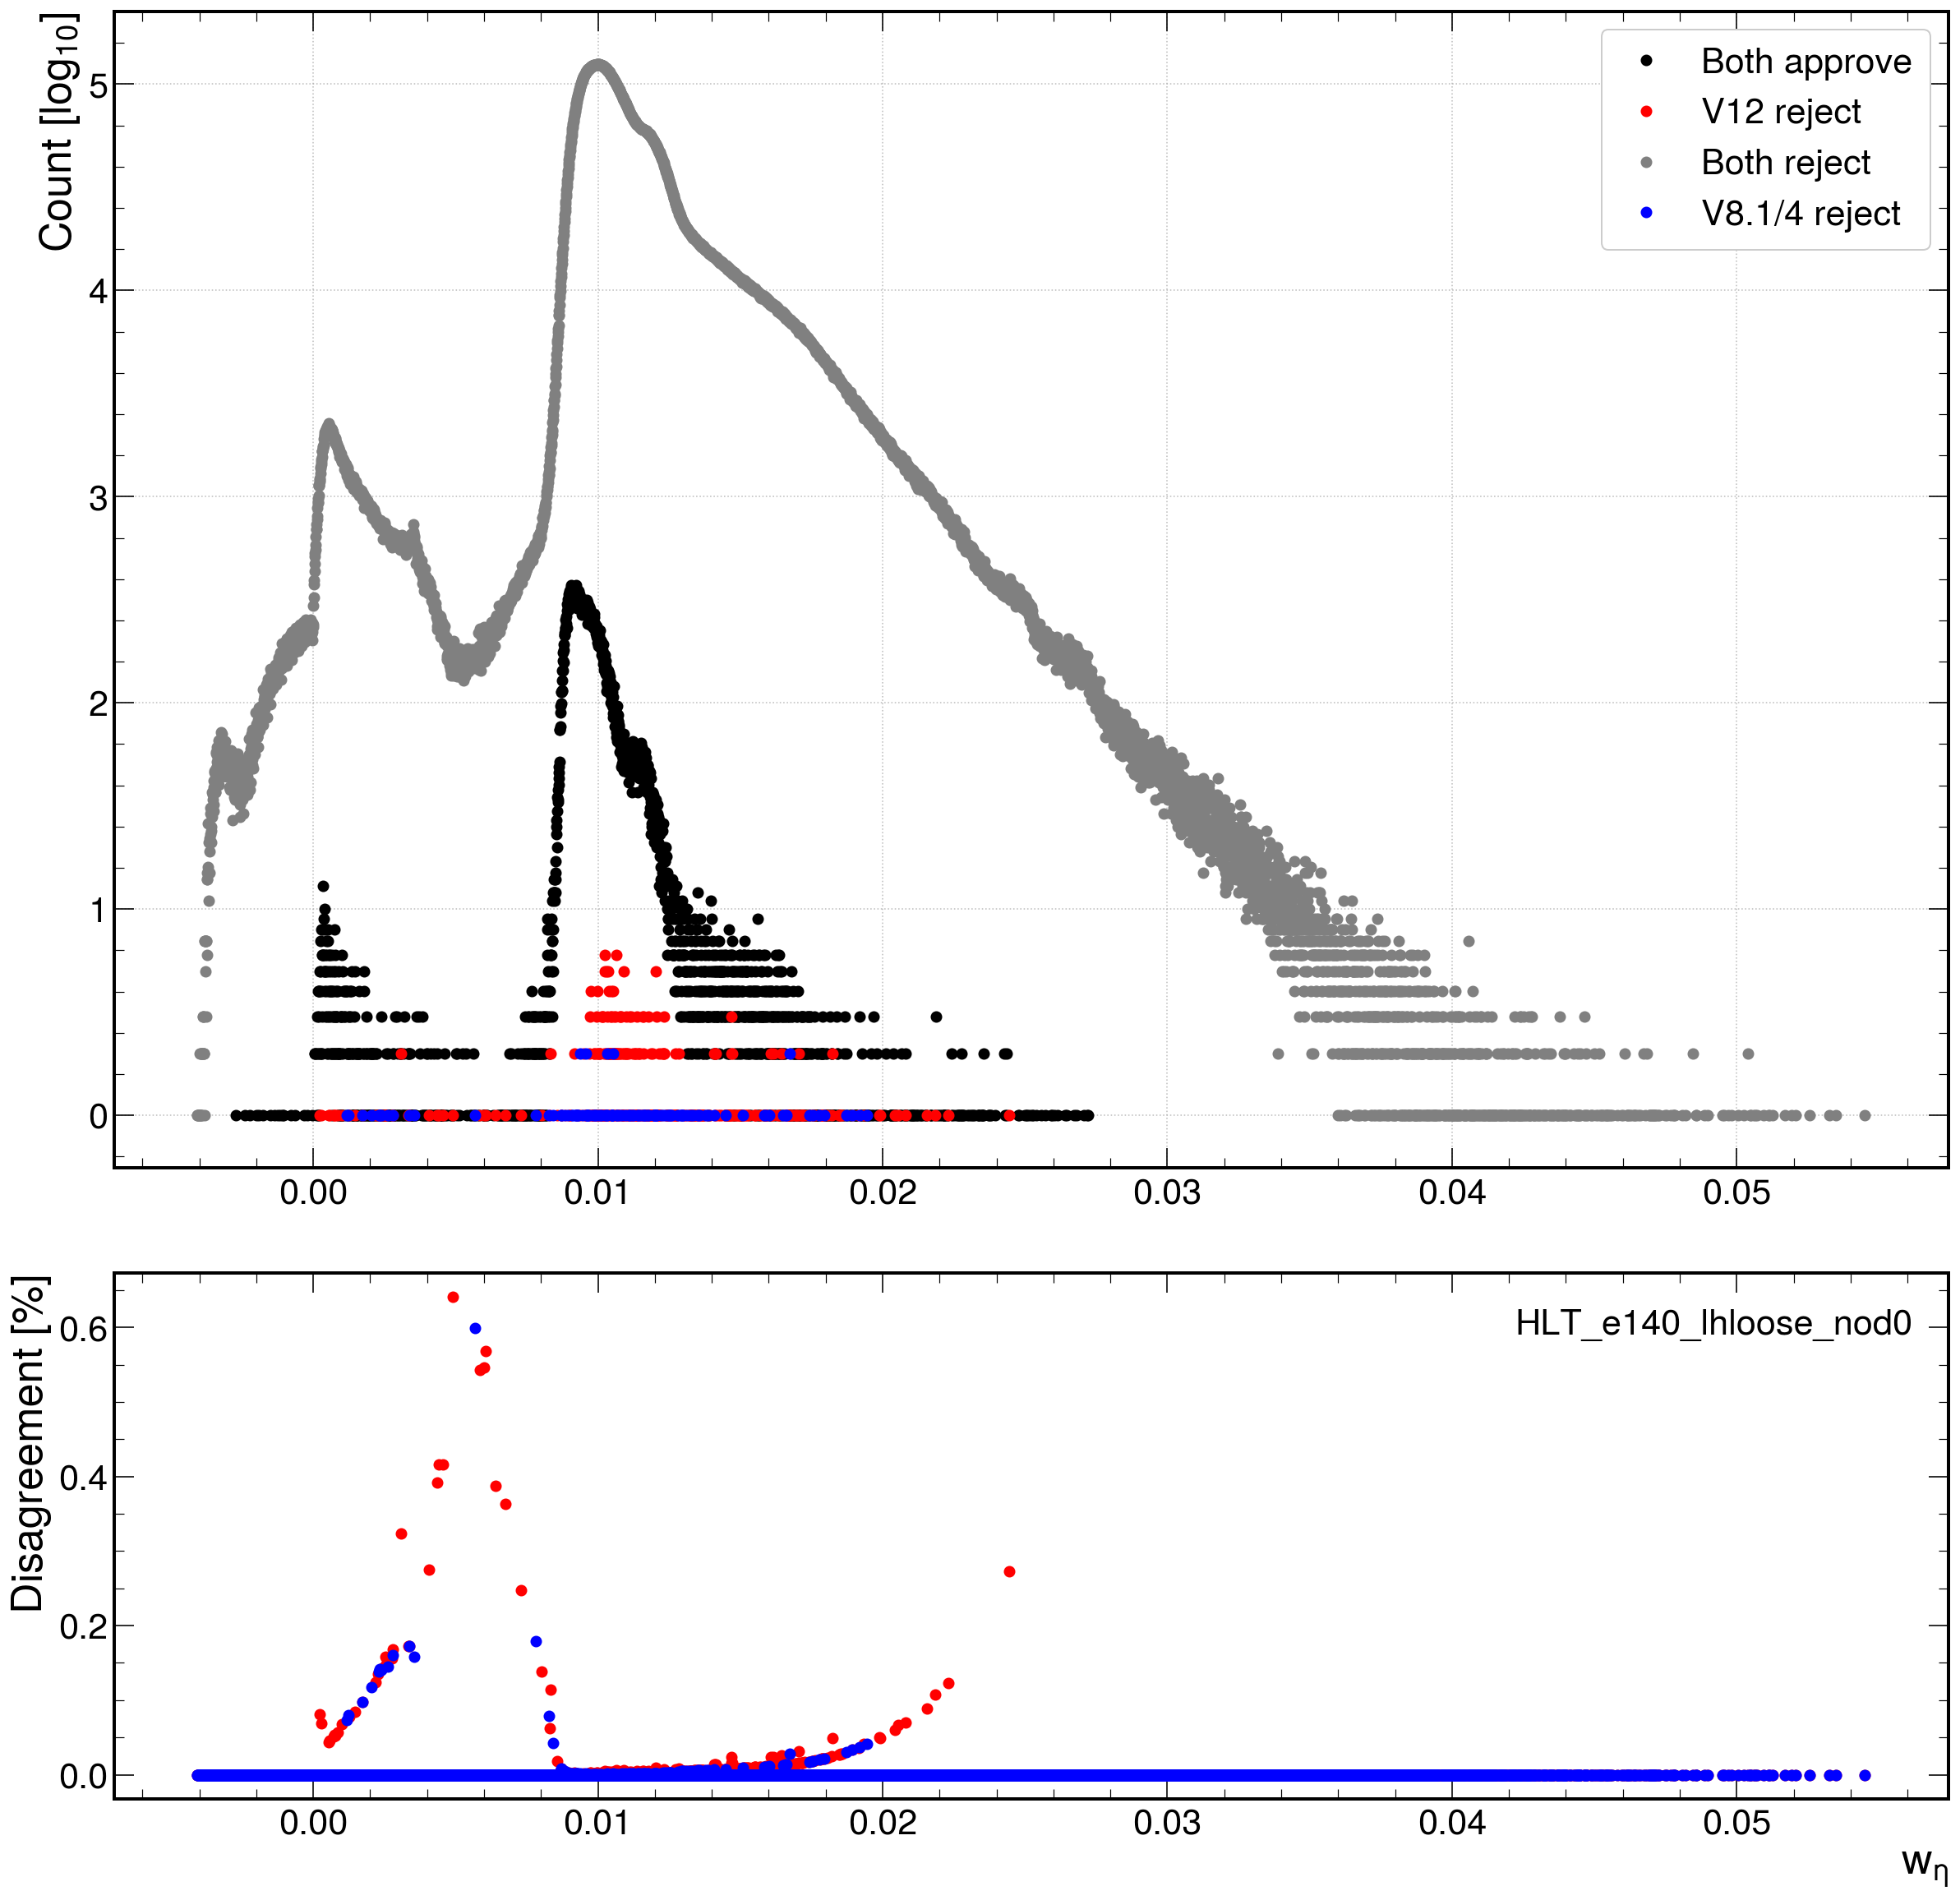

In [57]:
var = 'trig_L2_cl_weta2'

for step in [['L2Calo', 'L2', 'EFCalo', 'HLT'][3]]:
    plot_path = '/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad/weta'

    chain_list = ['e24_lhtight_nod0_{RINGER}_ivarloose',
                  'e26_lhtight_nod0_{RINGER}_ivarloose',
                  'e60_lhmedium_nod0_{RINGER}_L1EM24VHI',
                  'e140_lhloose_nod0_{RINGER}'
                 ]

    bins = int(np.sqrt(table.shape[0]))
    
    for chain in chain_list:
        chain = step + '_' + chain
        print('Processing %s ...' %(chain))
        
        # create quadrant tables
        #first_quad = table.loc[(table[chain.format(RINGER = alg1)]==1) & (table[chain.format(RINGER = alg2)]==1)]['el_eta']
        #second_quad = table.loc[(table[chain.format(RINGER = alg1)] !=1) & (table[chain.format(RINGER = alg2)] ==1)]['el_eta']
        #third_quad = table.loc[(table[chain.format(RINGER = alg1)] !=1) & (table[chain.format(RINGER = alg2)] !=1)]['el_eta']
        #fourth_quad = table.loc[(table[chain.format(RINGER = alg1)] ==1) & (table[chain.format(RINGER = alg2)] !=1)]['el_eta']
        
        # calculate counts for each quad
        ## constructing the tables here helps in saving memory
        [count_total, bins, nome] = plt.hist(table.loc[(table['trig_L2_cl_weta2']<10)][var], bins=bins)
        [count_first, bins, nome]  = plt.hist(table.loc[(table[chain.format(RINGER = alg1)] ==1) & (table[chain.format(RINGER = alg2)] ==1) & (table[var]<10)][var], bins=bins)
        [count_second, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = alg1)] !=1) & (table[chain.format(RINGER = alg2)] ==1) & (table[var]<10)][var], bins=bins)
        [count_third, bins, nome]  = plt.hist(table.loc[(table[chain.format(RINGER = alg1)] !=1) & (table[chain.format(RINGER = alg2)] !=1) & (table[var]<10)][var], bins=bins)
        [count_fourth, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = alg1)] ==1) & (table[chain.format(RINGER = alg2)] !=1) & (table[var]<10)][var], bins=bins)
        plt.clf()

        # create fig
        fig = plt.figure(figsize = (20,20), constrained_layout=False)
        gs = fig.add_gridspec(nrows=3, ncols=1)
        ax0 = fig.add_subplot(gs[:-1])
        ax1 = fig.add_subplot(gs[-1])
        
        # plot each quad
        ax0.plot(bins[:-1], np.log10(count_first), 'o', color = 'black', label='Both approve')
        ax0.plot(bins[:-1], np.log10(count_second), 'o', color = 'red', label=lbl1)
        ax0.plot(bins[:-1], np.log10(count_third), 'o', color = 'grey', label='Both reject')
        ax0.plot(bins[:-1], np.log10(count_fourth), 'o', color = 'blue', label=lbl2)
        ax0.set(ylabel='Count [$log_{10}$]')
        ax0.legend(frameon=True, framealpha=True)
        ax0.grid()
        
        # plot disagreement
        ax1.plot(bins[1], count_second[1]/count_total[1]*100, 'o', color = (0,0,0,0))
        ax1.plot(bins[:-1], count_second/count_total*100, 'o', color = 'red', label = lbl1)
        ax1.plot(bins[:-1], count_fourth/count_total*100, 'o', color = 'blue', label = lbl2)
        ax1.legend(['%s_%s_%s_nod0' %(step, chain.split('_')[1], chain.split('_')[2])], loc='best')
        ax1.set(ylabel='Disagreement [%]', xlabel='$w_{\eta}$')

        # save fig
        print('Saving ' + plot_path + '/quad_weta_%s_%s_%s ...'%(file_name, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path + '/quad_weta_%s_%s_%s.png'%(file_name, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path + '/quad_weta_%s_%s_%s.pdf'%(file_name, chain.split('_')[0], chain.split('_')[1]))
        fig.show()

### Quads for $w_{stot}$

In [ ]:
var = 'trig_L2_cl_wstot'

for step in [['L2Calo', 'L2', 'EFCalo', 'HLT'][3]]:
    plot_path = '/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad/wstot'

    chain_list = ['e24_lhtight_nod0_{RINGER}_ivarloose',
                  'e26_lhtight_nod0_{RINGER}_ivarloose',
                  'e60_lhmedium_nod0_{RINGER}_L1EM24VHI',
                  'e140_lhloose_nod0_{RINGER}'
                 ]

    bins = int(np.sqrt(table.shape[0]))
    
    for chain in chain_list:
        chain = step + '_' + chain
        print('Processing %s ...' %(chain))
        
        # create quadrant tables
        #first_quad = table.loc[(table[chain.format(RINGER = alg1)]==1) & (table[chain.format(RINGER = alg2)]==1)]['el_eta']
        #second_quad = table.loc[(table[chain.format(RINGER = alg1)] !=1) & (table[chain.format(RINGER = alg2)] ==1)]['el_eta']
        #third_quad = table.loc[(table[chain.format(RINGER = alg1)] !=1) & (table[chain.format(RINGER = alg2)] !=1)]['el_eta']
        #fourth_quad = table.loc[(table[chain.format(RINGER = alg1)] ==1) & (table[chain.format(RINGER = alg2)] !=1)]['el_eta']
        
        # calculate counts for each quad
        ## constructing the tables here helps in saving memory
        [count_total, bins, nome]  = plt.hist(table.loc[(table[var]!= -9999.0) & (table[var]<50)][var], bins=bins)
        [count_first, bins, nome]  = plt.hist(table.loc[(table[chain.format(RINGER = alg1)] ==1) & (table[chain.format(RINGER = alg2)] ==1) & (table[var]!=-9999.0) & (table[var]<50)][var], bins=bins)
        [count_second, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = alg1)] !=1) & (table[chain.format(RINGER = alg2)] ==1) & (table[var]!=-9999.0) & (table[var]<50)][var], bins=bins)
        [count_third, bins, nome]  = plt.hist(table.loc[(table[chain.format(RINGER = alg1)] !=1) & (table[chain.format(RINGER = alg2)] !=1) & (table[var]!=-9999.0) & (table[var]<50)][var], bins=bins)
        [count_fourth, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = alg1)] ==1) & (table[chain.format(RINGER = alg2)] !=1) & (table[var]!=-9999.0) & (table[var]<50)][var], bins=bins)
        plt.clf()

        # create fig
        fig = plt.figure(figsize = (20,20), constrained_layout=False)
        gs = fig.add_gridspec(nrows=3, ncols=1)
        ax0 = fig.add_subplot(gs[:-1])
        ax1 = fig.add_subplot(gs[-1])
        
        # plot each quad
        ax0.plot(bins[:-1], np.log10(count_first), 'o', color = 'black', label='Both approve')
        ax0.plot(bins[:-1], np.log10(count_second), 'o', color = 'red', label=lbl1)
        ax0.plot(bins[:-1], np.log10(count_third), 'o', color = 'grey', label='Both reject')
        ax0.plot(bins[:-1], np.log10(count_fourth), 'o', color = 'blue', label=lbl2)
        ax0.set(ylabel='Count [$log_{10}$]')
        ax0.legend(frameon=True, framealpha=True)
        ax0.grid()
        
        # plot disagreement
        ax1.plot(bins[1], count_second[1]/count_total[1]*100, 'o', color = (0,0,0,0))
        ax1.plot(bins[:-1], count_second/count_total*100, 'o', color = 'red', label = lbl1)
        ax1.plot(bins[:-1], count_fourth/count_total*100, 'o', color = 'blue', label = lbl2)
        ax1.legend(['%s_%s_%s_nod0' %(step, chain.split('_')[1], chain.split('_')[2])], loc='best')
        ax1.set(ylabel='Disagreement [%]', xlabel='$w_{stot}$')

        # save fig
        print('Saving ' + plot_path + '/quad_wstot_%s_%s_%s ...'%(file_name, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path + '/quad_wstot_%s_%s_%s.png'%(file_name, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path + '/quad_wstot_%s_%s_%s.pdf'%(file_name, chain.split('_')[0], chain.split('_')[1]))
        fig.show()

Processing HLT_e24_lhtight_nod0_{RINGER}_ivarloose ...


In [ ]:
print('End of script')

## Load Data

In [ ]:
# codigo modificado
boosted_dpath = '/home/pedro.lima/data/mc16_13TeV.302236_309995_341330.sgn.boosted_probes.WZ_llqq_plus_radion_ZZ_llqq_plus_ggH3000.merge.25bins.v2'
boosted_dpath+= '/mc16_13TeV.302236_309995_341330.sgn.boosted_probes.WZ_llqq_plus_radion_ZZ_llqq_plus_ggH3000.merge.25bins.v2_et{ET}_eta{ETA}.npz'
boosted_paths = []

#for et in [4]:
#    for eta in [0]:
#        boosted_paths.append( boosted_dpath.format(ET=et,ETA=eta) )
#for et in range(5):
#    for eta in range(5):
#        boosted_paths.append( boosted_dpath.format(ET=et,ETA=eta) )

dev = True

if dev:
    range_et = [4]   #leblon = 4
    range_eta = [0]  #leblon = 0
else:
    range_et = range(5)
    range_eta = range(5)

for et in range_et:
    for eta in range_eta:
        boosted_paths.append( dpath.format(ET=et,ETA=eta) )

In [ ]:
drop_columns = [
                    'RunNumber', 
                    #'avgmu',
                    #'trig_L2_cl_et',
                    #'trig_L2_cl_eta',
                    #'trig_L2_cl_phi',
                    #'trig_L2_cl_reta',
                    #'trig_L2_cl_ehad1', 
                    #'trig_L2_cl_eratio',
                    #'trig_L2_cl_f1', 
                    #'trig_L2_cl_f3', 
                    #'trig_L2_cl_weta2', 
                    #'trig_L2_cl_wstot', 
                    'trig_L2_cl_e2tsts1',
                    'trig_L2_el_hastrack',
                    #'trig_L2_el_pt',
                    'trig_L2_el_eta',
                    'trig_L2_el_phi',
                    'trig_L2_el_caloEta',
                    'trig_L2_el_trkClusDeta',
                    'trig_L2_el_trkClusDphi',
                    'trig_L2_el_etOverPt',
                    'trig_EF_cl_hascluster',
                    #'trig_EF_cl_et',
                    'trig_EF_cl_eta',
                    'trig_EF_cl_etaBE2',
                    'trig_EF_cl_phi',     
                    'trig_EF_el_hascand',
                    #'trig_EF_el_et',
                    'trig_EF_el_eta',
                    'trig_EF_el_etaBE2',
                    'trig_EF_el_phi',
                    'trig_EF_el_rhad1',
                    'trig_EF_el_rhad',
                    'trig_EF_el_f3',
                    'trig_EF_el_weta2',
                    'trig_EF_el_rphi',
                    'trig_EF_el_reta',
                    'trig_EF_el_wtots1',
                    'trig_EF_el_eratio',
                    'trig_EF_el_f1',
                    'trig_EF_el_hastrack',
                    'trig_EF_el_deltaEta1',
                    'trig_EF_el_deltaPhi2',
                    'trig_EF_el_deltaPhi2Rescaled',
                    #'trig_EF_el_lhtight',
                    #'trig_EF_el_lhmedium',
                    #'trig_EF_el_lhloose',
                    #'trig_EF_el_lhvloose', 
                    # Offline variables
                    #'el_et',
                    #'el_eta',
                    'el_etaBE2',
                    #'el_phi',
                    # offline shower shapers
                    #'el_rhad1',
                    #'el_rhad',
                    #'el_f3',
                    #'el_weta2',
                    #'el_rphi',
                    #'el_reta',
                    #'el_wtots1',
                    #'el_eratio',
                    #'el_f1',
                    # offline track
                    #'el_hastrack',
                    'el_numberOfBLayerHits',
                    'el_numberOfPixelHits',
                    'el_numberOfTRTHits',
                    #'el_d0',
                    #'el_d0significance',
                    #'el_eProbabilityHT',
                    'el_trans_TRT_PID',
                    #'el_deltaEta1',
                    'el_deltaPhi2',
                    #'el_deltaPhi2Rescaled',
                    #'el_deltaPOverP',
                    #'el_lhtight',
                    #'el_lhmedium',
                    #'el_lhloose',
                    #'el_lhvloose',
                    'el_TaP_Mass',
                    #'el_TaP_deltaR',
                ]

#drop_columns.extend( ['trig_L2_cl_ring_%d'%i for i in range(100)] )

In [ ]:
os.environ['RINGER_TUNING_PATH']='/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/tunings'

decorators = create_ringer_v8_new_decorators()
decorators += create_ringer_v8_half_fast_decorators()
#decorators+= create_ringer_v9_decorators()
#decorators += create_ringer_v8_34_decorators()
decorators += create_ringer_v8_14_decorators()

## Setup Chains

In [ ]:
# create my chain
chains = [
            Chain( "HLT_e24_lhtight_nod0_noringer_ivarloose" , L1Seed = 'L1_EM22VHI'),
            Chain( "HLT_e24_lhtight_nod0_ringer_v8_new_ivarloose", L1Seed = 'L1_EM22VHI' , l2calo_column = 'ringer_v8_new_tight' ),
            Chain( "HLT_e24_lhtight_nod0_ringer_v8_half_ivarloose", L1Seed = 'L1_EM22VHI' , l2calo_column = 'ringer_v8_half_tight' ),
            #Chain( "HLT_e24_lhtight_nod0_ringer_v8_34_ivarloose", L1Seed = 'L1_EM22VHI' , l2calo_column = 'ringer_v8_34_tight' ),
            Chain( "HLT_e24_lhtight_nod0_ringer_v8_14_ivarloose", L1Seed = 'L1_EM22VHI' , l2calo_column = 'ringer_v8_14_tight' ),

            Chain( "HLT_e26_lhtight_nod0_noringer_ivarloose" , L1Seed = 'L1_EM22VHI'),
            Chain( "HLT_e26_lhtight_nod0_ringer_v8_new_ivarloose", L1Seed = 'L1_EM22VHI' , l2calo_column = 'ringer_v8_new_tight' ),
            Chain( "HLT_e26_lhtight_nod0_ringer_v8_half_ivarloose", L1Seed = 'L1_EM22VHI' , l2calo_column = 'ringer_v8_half_tight' ),
            #Chain( "HLT_e26_lhtight_nod0_ringer_v8_34_ivarloose", L1Seed = 'L1_EM22VHI' , l2calo_column = 'ringer_v8_34_tight' ),
            Chain( "HLT_e26_lhtight_nod0_ringer_v8_14_ivarloose", L1Seed = 'L1_EM22VHI' , l2calo_column = 'ringer_v8_14_tight' ),

            Chain( "HLT_e60_lhmedium_nod0_noringer_L1EM24VHI" , L1Seed = 'L1_EM24VHI'),
            Chain( "HLT_e60_lhmedium_nod0_ringer_v8_new_L1EM24VHI", L1Seed = 'L1_EM24VHI' , l2calo_column = 'ringer_v8_new_medium'),
            Chain( "HLT_e60_lhmedium_nod0_ringer_v8_half_L1EM24VHI", L1Seed = 'L1_EM24VHI' , l2calo_column = 'ringer_v8_half_medium'),
            #Chain( "HLT_e60_lhmedium_nod0_ringer_v8_34_L1EM24VHI", L1Seed = 'L1_EM24VHI' , l2calo_column = 'ringer_v8_34_medium'),
            Chain( "HLT_e60_lhmedium_nod0_ringer_v8_14_L1EM24VHI", L1Seed = 'L1_EM24VHI' , l2calo_column = 'ringer_v8_14_medium'),

          
            Chain( "HLT_e140_lhloose_nod0_noringer"  , L1Seed = 'L1_EM24VHI'),
            Chain( "HLT_e140_lhloose_nod0_ringer_v8_new" , L1Seed = 'L1_EM24VHI', l2calo_column = 'ringer_v8_new_loose'),
            Chain( "HLT_e140_lhloose_nod0_ringer_v8_half" , L1Seed = 'L1_EM24VHI', l2calo_column = 'ringer_v8_half_loose'),
            #Chain( "HLT_e140_lhloose_nod0_ringer_v8_34" , L1Seed = 'L1_EM24VHI', l2calo_column = 'ringer_v8_34_loose'),
            Chain( "HLT_e140_lhloose_nod0_ringer_v8_14" , L1Seed = 'L1_EM24VHI', l2calo_column = 'ringer_v8_14_loose'),
]

## Read all bins

In [ ]:
boosted_table = load_in_loop( boosted_paths, drop_columns=drop_columns, decorators=decorators, chains=chains )

In [ ]:
if True:
    print(boosted_table.columns.to_list())

In [ ]:
print('End of script')